<h1>Descriptive Statistics for tweetDate & authorLocation</h1>

<h3>Packages & Options</h3>

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [4]:
import matplotlib

In [5]:
import dateutil

In [6]:
import re

<h3>Import Data</h3>

In [9]:
df = pd.read_pickle('20190328_AM_Data')

In [10]:
df[0:1]

authorFollower  authorFriend authorLang authorLocation  \
0  197             579           en         NaN             

                                                                   authorPicture  \
0  http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png   

     authorScreen authorScreen_original      tweetID tweetID_original  \
0  darleneclarke5  NaN                   1.10272e+18  nan               

                                                          tweetMethod  \
0  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   

                                                                                                                                                                                                                                                                         tweetText  \
0  RT @ezralevant: Abdul Habash, a Syrian migrant to Canada, made a terrifying bomb threat against Jason Kenney. He and his dad told our reporter it’s no big deal — in fact, they’re mad the cops won’t give him his computer and phone back. #terrorists https://t.co/AujC0eU4Sk   

                    tweetTimeDate  \
0  Mon Mar 04 23:59:47 +0000 2019   

                                                         tweetURL  \
0  http://twitter.com/darleneclarke5/statuses/1102720324875894785   

  authorLang_new authorLocation_new authorPicture_new tweetMethod_new  \
0  English        NaN                Default           Web_Standard     

          tweetTimeDate_new  
0 2019-03-04 23:59:47+00:00

In [14]:
df[authorLang].describe()

NameError: name 'authorLang' is not defined

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 18 columns):
authorFollower           123524 non-null int64
authorFriend             123524 non-null int64
authorLang               123524 non-null object
authorLocation           85206 non-null object
authorPicture            123524 non-null object
authorScreen             123524 non-null object
authorScreen_original    9666 non-null object
tweetID                  123524 non-null object
tweetID_original         123524 non-null object
tweetMethod              123524 non-null object
tweetText                123524 non-null object
tweetTimeDate            123524 non-null object
tweetURL                 123524 non-null object
authorLang_new           123524 non-null object
authorLocation_new       85206 non-null category
authorPicture_new        123524 non-null object
tweetMethod_new          123524 non-null object
tweetTimeDate_new        123524 non-null datetime64[ns, tzutc()]
dtypes: cate

<h3>Recode authorLocation</h3>

In [103]:
df['authorLocation'].value_counts()[0:100]

United States               3475
USA                         1187
California, USA             1027
Texas, USA                  932 
Florida, USA                857 
Washington, DC              680 
London                      652 
London, England             648 
Canada                      561 
United Kingdom              530 
England, United Kingdom     516 
Los Angeles, CA             476 
New York, NY                475 
Australia                   391 
Texas                       382 
UK                          375 
New York, USA               343 
France                      339 
Chicago, IL                 337 
Earth                       298 
Pennsylvania, USA           297 
Arizona, USA                292 
Austin, TX                  289 
Michigan, USA               287 
Ohio, USA                   274 
North Carolina, USA         271 
Georgia, USA                258 
California                  243 
Virginia, USA               234 
Paris, France               225 
          

I would like to recode the data into these levels:
<ul><li>Group 1: USA-Northeast</li>
    <li>Group 2: USA-Southeast</li>
    <li>Group 3: USA-Midwest</li>
    <li>Group 4: USA-Southwest</li>
    <li>Group 5: USA-Coastal West</li>
    <li>Group 6: USA-Mountain West</li>
    <li>Group 3: Non USA</li></ul>

Here is a csv mapping state names and abbreviations to regions.

In [12]:
usRegions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [13]:
usRegions.head()

State State Code Region            Division
0  Alaska      AK         West   Pacific           
1  Alabama     AL         South  East South Central
2  Arkansas    AR         South  West South Central
3  Arizona     AZ         West   Mountain          
4  California  CA         West   Pacific

A bit of data prep:

In [29]:
usRegions.rename(columns={'State Code':'StateCode'}, inplace=True)

In [30]:
usRegions = usRegions.drop(['Division'], axis=1)

In [39]:
usRegions['Country'] = 'United States'

In [40]:
usRegions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State        51 non-null object
StateCode    51 non-null object
Region       51 non-null object
Country      51 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [41]:
usRegions

State StateCode     Region        Country
0   Alaska                AK        West       United States
1   Alabama               AL        South      United States
2   Arkansas              AR        South      United States
3   Arizona               AZ        West       United States
4   California            CA        West       United States
5   Colorado              CO        West       United States
6   Connecticut           CT        Northeast  United States
7   District of Columbia  DC        South      United States
8   Delaware              DE        South      United States
9   Florida               FL        South      United States
10  Georgia               GA        South      United States
11  Hawaii                HI        West       United States
12  Iowa                  IA        Midwest    United States
13  Idaho                 ID        West       United States
14  Illinois              IL        Midwest    United States
15  Indiana               IN        Midwest    United States
16  Kansas                KS        Midwest    United States
17  Kentucky              KY        South      United States
18  Louisiana             LA        South      United States
19  Massachusetts         MA        Northeast  United States
20  Maryland              MD        South      United States
21  Maine                 ME        Northeast  United States
22  Michigan              MI        Midwest    United States
23  Minnesota             MN        Midwest    United States
24  Missouri              MO        Midwest    United States
25  Mississippi           MS        South      United States
26  Montana               MT        West       United States
27  North Carolina        NC        South      United States
28  North Dakota          ND        Midwest    United States
29  Nebraska              NE        Midwest    United States
30  New Hampshire         NH        Northeast  United States
31  New Jersey            NJ        Northeast  United States
32  New Mexico            NM        West       United States
33  Nevada                NV        West       United States
34  New York              NY        Northeast  United States
35  Ohio                  OH        Midwest    United States
36  Oklahoma              OK        South      United States
37  Oregon                OR        West       United States
38  Pennsylvania          PA        Northeast  United States
39  Rhode Island          RI        Northeast  United States
40  South Carolina        SC        South      United States
41  South Dakota          SD        Midwest    United States
42  Tennessee             TN        South      United States
43  Texas                 TX        South      United States
44  Utah                  UT        West       United States
45  Virginia              VA        South      United States
46  Vermont               VT        Northeast  United States
47  Washington            WA        West       United States
48  Wisconsin             WI        Midwest    United States
49  West Virginia         WV        South      United States
50  Wyoming               WY        West       United States

<h3>The approach</h3>

In [14]:
#Here's what I'd like to do:
#For each row in usRegions:
    #Attempt to match (using regex) usRegions[State] in df['authorLocation].
        #If True, replace df['authorLocation_new] with usRegions['Region'].
    #Attempt to match using regex the StateCode value in df['authorLocation].
        #If True, replace df['authorLocation_new] with usRegions['Region'].
#Print value counts for df['authorLocation_new]

<h3>Test Data</h3>

In [15]:
df1 = usRegions[0:5]
df1

State StateCode Region
0  Alaska      AK        West 
1  Alabama     AL        South
2  Arkansas    AR        South
3  Arizona     AZ        West 
4  California  CA        West

In [16]:
df2 = df[{'authorLocation_new','authorLocation'}][10:20]
df2

authorLocation     authorLocation_new
10  NaN                    NaN                  
11  California, USA        California, USA      
12  Florida, USA           Florida, USA         
13  NaN                    NaN                  
14  NaN                    NaN                  
15  NaN                    NaN                  
16  Neo Swabia             Neo Swabia           
17  NaN                    NaN                  
18  TX                     TX                   
19  Cities of Corruption   Cities of Corruption

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
State        5 non-null object
StateCode    5 non-null object
Region       5 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 10 to 19
Data columns (total 2 columns):
authorLocation        5 non-null object
authorLocation_new    5 non-null category
dtypes: category(1), object(1)
memory usage: 205.1+ KB


Not making any progress, so I will attempt the simpler approach, which recodes authorLocation simply into US or not-US.

In [104]:
df['authorLocation'].value_counts()[0:5]

United States      3475
USA                1187
California, USA    1027
Texas, USA         932 
Florida, USA       857 
Name: authorLocation, dtype: int64

In [105]:
df['authorLocation'].str.contains('.*USA.*', regex=True).value_counts()

False    73056
True     12150
Name: authorLocation, dtype: int64

In [132]:
df['authorLocation_SOCI620_1'] = df['authorLocation']

In [133]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*USA.*', value='United States')

In [134]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*United Kingdom.*', value='United Kingdom')

In [135]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*UK.*', value='United Kingdom')

In [136]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*England.*', value='United Kingdom')

In [137]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*New South Wales.*', value='Australia')

In [138]:
df['authorLocation_SOCI620_1'] = df['authorLocation_SOCI620_1'].replace(regex=r'.*Melbourne, Victoria.*', value='Australia')

In [161]:
df['authorLocation_SOCI620_1'].value_counts()[0:50]

United States        15625
United Kingdom       5385 
Australia            696  
Washington, DC       680  
London               652  
Canada               561  
Los Angeles, CA      476  
New York, NY         475  
Texas                382  
France               339  
Chicago, IL          337  
Earth                298  
Austin, TX           289  
California           243  
Paris, France        225  
Houston, TX          222  
New York             215  
San Diego, CA        214  
San Francisco, CA    208  
Seattle, WA          204  
Deutschland          196  
Ireland              194  
Florida              190  
Boston, MA           186  
Toronto, Ontario     186  
Los Angeles          183  
Ontario, Canada      180  
Philadelphia, PA     177  
Phoenix, AZ          173  
Atlanta, GA          172  
Portland, OR         161  
Dallas, TX           150  
NYC                  148  
Brooklyn, NY         145  
Planet Earth         133  
IBRK                 132  
Global               126  
P

Also not making any progress on trying to match and recode state abbreviation mentions. Sunyam / Stefan: Any suggestions? Ideally, we will recode any authorLocations that mention a US state or state abbreviation to the appropriate region, according to the usRegions dataframe.

In [78]:
# Creates two useful dictionaries:
map_state_region = dict([tuple(x) for x in usRegions[['State', 'Region']].values])
map_stateCode_region = dict([tuple(x) for x in usRegions[['StateCode', 'Country']].values])

# Maps location to region:
map_loc_region = {}
for loc in df['authorLocation'].tolist():
    loc = str(loc)
    for attempt in loc.split(', '): # attempt could be a city name, country name, state name (we don't know)
        try:
            region = map_stateCode_region[attempt]
            map_loc_region[loc] = region
        except:
            pass

# map_loc_region should contain what we need. And we can map it to the dataframe using:
df['authorLocation_SOCI620_1'] = df['authorLocation'].map(map_loc_region)

In [37]:
df['authorRegion'].value_counts()

South        5287
West         4410
Northeast    2625
Midwest      1889
Name: authorRegion, dtype: int64

In [72]:
# Creates two useful dictionaries:
map_state_region = dict([tuple(x) for x in usRegions[['State', 'Region']].values])
map_stateCode_region = dict([tuple(x) for x in usRegions[['StateCode', 'Region']].values])

# Maps location to region:
map_loc_region = {}
for loc in df['authorLocation'].tolist():
    loc = str(loc)
    for attempt in loc.split(','): # attempt could be a city name, country name, state name (we don't know)
        try:
            region = map_stateCode_region[attempt]
            map_loc_region[loc] = region
        except:
            try:
                region = map_state_region[attempt]
                map_loc_region[loc] = region
            except:
                print("No entry for: ", attempt)

# map_loc_region should contain what we need. And we can map it to the dataframe using:
df['authorRegion'] = df['authorLocation'].map(map_loc_region)

No entry for:  nan
No entry for:  top your momma
No entry for:  nan
No entry for:  nan
No entry for:  Netherlands
No entry for:  nan
No entry for:  nan
No entry for:  F研 なのるな Attellui
No entry for:  nan
No entry for:  Bleckede
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Neo Swabia
No entry for:  nan
No entry for:  Cities of Corruption 
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Nashville Tn./Music City
No entry for:  United States
No entry for:  nan
No entry for:  Florida/Alabama
No entry for:  nan
No entry for:  nan
No entry for:  Ireland
No entry for:  San Diego
No entry for:   CA
No entry for:  nan
No entry for:  Washington D.C.
No entry for:  Litchfield Park
No entry for:   AZ
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Y gwir erbyn y Byd 🇺🇸🐑🏴󠁧󠁢󠁳󠁣󠁴󠁿🇱🇹
No entry for:  Paris  
No entry for:   DC
No entry for:  Tinto

No entry for:  Paradise Valley
No entry for:   AZ
No entry for:  nan
No entry for:  Portugal
No entry for:  In-Between Worlds
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Boston
No entry for:  nan
No entry for:  Chicago
No entry for:   IL
No entry for:  Photic zone
No entry for:  nan
No entry for:  New Asia Old Canada
No entry for:  Baton Rouge
No entry for:   LA
No entry for:  nan
No entry for:  Redmond
No entry for:   WA via Dernah
No entry for:   Libya.
No entry for:  US
No entry for:  Oakwood
No entry for:   GA
No entry for:  nan
No entry for:  Hyderabad
No entry for:  Highland Park
No entry for:   TX
No entry for:  Orlando
No entry for:   FL
No entry for:  Not Russia
No entry for:  Norwich
No entry for:   CT
No entry for:  Tucson
No entry for:   AZ
No entry for:  ΜΟΛΩΝ ΛΑΒΕ
No entry for:  Not Russia
No entry for:   USA
No entry for:  United States
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  Seattle
No entry for:   WA
N

No entry for:  5408
No entry for:  San Diego
No entry for:   CA
No entry for:  nan
No entry for:  Tucson
No entry for:   AZ
No entry for:  Paris
No entry for:   France
No entry for:  D.S.SENSE
No entry for:  MI. pop. 1
No entry for:  i choose Red States
No entry for:   USA
No entry for:  NEW YORK
No entry for:  Nairobi.
No entry for:   USA
No entry for:  nan
No entry for:  NW Burbs of Chicago
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  Bellevue
No entry for:   Washington
No entry for:  United States
No entry for:  nan
No entry for:  archdale nc
No entry for:  nan
No entry for:  the lowest of the low desert
No entry for:  Texas Hill Country
No entry for:  陸の孤島
No entry for:  Tyler
No entry for:   TX
No entry for:  south Londinium
No entry for:  Arizona - Texas
No entry for:   USA
No entry for:  Over There 
No entry for:  Right side of the mirror.
No entry for:  Wolverhampton.
No entry for:  France
No entry for:  Alaska🇺🇸Israel🇮🇱
No entry for:  Atlanta
No en

No entry for:  Sydney
No entry for:  grenoble france
No entry for:  Nowhere
No entry for:  Exceptional USA
No entry for:  People's Republic of China
No entry for:  nan
No entry for:  Manchester
No entry for:   England
No entry for:  Denver
No entry for:   CO
No entry for:  America
No entry for:  Welcome to the twilight Zone..
No entry for:  Alsace
No entry for:   France
No entry for:  France
No entry for:  Ontario
No entry for:   CAN
No entry for:  nan
No entry for:  New Zealand
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Scottish Highlands
No entry for:  somewhere south
No entry for:  Kampala
No entry for:  London/Sopot
No entry for:  Dans mon fort intérieur.
No entry for:  nan
No entry for:   USA
No entry for:  Tokyo
No entry for:  718
No entry for:  Roma Italia
No entry for:  London
No entry for:   Devon & France
No entry for:  Automated-Babylon
No entry for:  Québec
No entry for:   Canada
No entry for:  Knoxville
No entry for:   TN
No entry for:  Hampshi

No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  New Zealand
No entry for:  nan
No entry for:  San Diego
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  New Zealand
No entry for:  You battle God Himself when you take on His protectorates. Good luck defeating God!
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  Pennsyltucky
No entry for:  nan
No entry for:  USA
No entry for:  France
No entry for:   USA
No entry for:  Los Angeles
No entry for:   CA
No entry for:   USA
No entry for:  In the EU
No entry for:  United States
No entry for:  Ireland
No entry for:   USA
No entry for:  nan
No entry for:  ATH
No entry for:  USA
No entry for:  nan
No entry for:   USA
No entry for:  Ingolstadt
No entry for:  Bayern
No entry for:  Deutschland
No entry for:  United States
No entry

No entry for:   Colombia
No entry for:  Montréal
No entry for:   Québec
No entry for:  Cranberry Township PA
No entry for:  Pembrokeshire
No entry for:   Wales
No entry for:   UK.
No entry for:  Canada
No entry for:  Borough of Queens
No entry for:   NYC
No entry for:   NY USA
No entry for:  Paris
No entry for:   France
No entry for:  nan
No entry for:  Wales/ London
No entry for:  United States
No entry for:  Burlington
No entry for:   VT
No entry for:   D.C.
No entry for:  nan
No entry for:  nottingham. england.
No entry for:  nan
No entry for:  NYC via Chicago
No entry for:  Michigan City
No entry for:   IN
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Brussels and beyond
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Sweden
No entry for:  nan
No entry for:  Worldwide
No entry for:  Petal
No entry for:   MS
No entry for:  USA
No entry for:  Chula Vista
No entry for:   CA
No entry for:  nan
No entry for:  nan
No 

No entry for:  nan
No entry for:  Miami
No entry for:   FL
No entry for:  Colorado Springs
No entry for:   CO
No entry for:  Bath
No entry for:   England
No entry for:  Santo Domingo
No entry for:   D.R.
No entry for:  Paris
No entry for:   France
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:   USA
No entry for:  Cork
No entry for:   Ireland
No entry for:  Southeast US
No entry for:  Los Angeles.
No entry for:  Trump
No entry for:  nan
No entry for:  ÜT: 41.407313
No entry for:  2.159073
No entry for:  nan
No entry for:  Land of Oz
No entry for:  Haut-Rhin
No entry for:   Alsace
No entry for:  nan
No entry for:  nan
No entry for:  Suisse
No entry for:  São Paulo
No entry for:   Brasil
No entry for:  Everywhere
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  Deplorable OR
No entry for:  nan
No entry for:   DC
No entry for:  Beauvais
No entry for:   France
No entry for:  Dallas
No entry for:

No entry for:   USA
No entry for:  NorthShore near New Orleans
No entry for:  nan
No entry for:  Berlin
No entry for:   Germany
No entry for:  Milano
No entry for:   Lombardia
No entry for:  Curitiba
No entry for:  Loughborough
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Houston
No entry for:   TX
No entry for:  nan
No entry for:  Scarsdale
No entry for:   New York
No entry for:   USA
No entry for:  nan
No entry for:  Saint Louis
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Kano
No entry for:   Nigeria
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Chilliwack
No entry for:   British Columbia
No entry for:  Saskatchewan
No entry for:   Canada
No entry for:   USA
No entry for:   USA
No entry for:  Phoenix
No entry for:   AZ
No entry for:  Brussels
No entry for:   USA
No entry for:  Sintiland
No entry for:  nan
No entry for:  nan
No entry for:  North West
No entry

No entry for:  nan
No entry for:  nan
No entry for:  The Atlanta area
No entry for:  frozen northland
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Portland
No entry for:   OR
No entry for:  Benador Associates
No entry for:  Wherever it is
No entry for:   TFTI
No entry for:  nan
No entry for:  Goodyear
No entry for:   AZ
No entry for:  nan
No entry for:  Montevideo
No entry for:   Uruguay
No entry for:  The Interwebs
No entry for:  nan
No entry for:  Manhattan
No entry for:   NY
No entry for:   USA
No entry for:  The Lone Star State
No entry for:  Columbia
No entry for:   MO
No entry for:  nan
No entry for:  Chambersburg
No entry for:   PA
No entry for:  Paris  -  Galicia
No entry for:  nan
No entry for:  Legally in Texas
No entry for:   DC
No entry for:  Benador Associates
No entry for:  Manchester
No entry for:   Limousin
No entry for:   EU
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  País Vasco
No entry for:  nan
No entry for:  V

No entry for:  Miami / Fort Lauderdale
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Lima
No entry for:   Perú
No entry for:  Marseille
No entry for:   France
No entry for:  3rdCoast
No entry for:  richmond virginia
No entry for:  Plumb Nelly
No entry for:  Houston
No entry for:   TX
No entry for:  Jewel of Coachella Valley 
No entry for:  Merced
No entry for:   CA
No entry for:  Los Angeles
No entry for:   CA
No entry for:  En Route
No entry for:  nan
No entry for:  nan
No entry for:  HOU | CMH | DAL | DC
No entry for:  VENICE Florida
No entry for:  nan
No entry for:  Harlem 
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Mid-Westeros 
No entry for:  West By God Virginia
No entry for:  San Antonio
No entry for:   TX and NYC
No entry for:  Hauts-de-Seine
No entry for:   Ile-de-France
No entry for:  Calgary
No entry for:   Alberta
No entry for:   Canada
No entry for:  Trumpmergency
No entry for:   USA
No entry for:  England
No

No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  20505
No entry for:  none of your business
No entry for:  Houston
No entry for:   Texas
No entry for:  Cornwall
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Cardiff
No entry for:   Wales
No entry for:   USA
No entry for:  England
No entry for:   USA
No entry for:   Colombia
No entry for:  Leading by Example
No entry for:  France
No entry for:   Grande Bleue
No entry for:  nan
No entry for:  Detroit
No entry for:   MI
No entry for:  my own thoughts
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Scotland 🇪🇺
No entry for:  Canada 🇨🇦
No entry for:  South Texas
No entry for:  Coastal O.C.
No entry for:   CA
No entry for:   America
No entry for:  St James City
No entry for:   FL
No entry for:   USA
No entry for:  nan
No entry for:  Zachary
No entry for:   LA
No entry for:  United States
No entry for:   USA
No entry for:  nan
No ent

No entry for:  Leeds
No entry for:   UK
No entry for:  U.S.A.
No entry for:  nan
No entry for:   USA
No entry for:  Houston
No entry for:   TX
No entry for:  Paris
No entry for:   France
No entry for:  Gustavo A. Madero
No entry for:  USA
No entry for:   DC
No entry for:  nan
No entry for:  Michigan Center
No entry for:   MI
No entry for:  nan
No entry for:  United States
No entry for:  Sverige
No entry for:  Berlin
No entry for:   Germany
No entry for:  Southern California
No entry for:  Klepp
No entry for:   Norge
No entry for:  Michigan Center
No entry for:   MI
No entry for:  Michigan Center
No entry for:   MI
No entry for:  Michigan Center
No entry for:   MI
No entry for:  Theatre of the Mind.
No entry for:  North West
No entry for:   England
No entry for:  nan
No entry for:  Michigan Center
No entry for:   MI
No entry for:  Buffalo
No entry for:   NY -- Austin
No entry for:   TX
No entry for:  Mars?
No entry for:  UK
No entry for:  Queens
No entry for:   NY
No entry for:   USA
No

No entry for:  nan
No entry for:  nan
No entry for:  sa
No entry for:   tx
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  Hopeless Agnostic
No entry for:   USA
No entry for:  Bury St Edmunds
No entry for:  nan
No entry for:  Minnesota 
No entry for:  Frozen Tundra
No entry for:  nan
No entry for:   USA
No entry for:  Scheyischbi
No entry for:   Lenapehoking 
No entry for:  Earth
No entry for:  sack and jam
No entry for:  California USA
No entry for:  Undisclosed
No entry for:  nan
No entry for:  GTA
No entry for:   Ontario
No entry for:   Canada
No entry for:  San Jose
No entry for:   CA
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  British Columbia
No entry for:   Canada
No entry for:  UK
No entry for:   USA
No entry for:  here - heaven is real
No entry for:  nan
No entry for:  Chicago 
No entry for:  San Francisco
No entry for:   CA
No entry for:   USA
No entry for:  ÜT: 34.041042
No entry for:  -118.191894
No entry for:  nan
No 

No entry for:   Florida
No entry for:  SouthEastern USA
No entry for:  nan
No entry for:   USA
No entry for:  Eureka Springs
No entry for:   Arkansas
No entry for:  England
No entry for:   United Kingdom
No entry for:  nan
No entry for:  Ciudad de México
No entry for:  nan
No entry for:  Cape Town
No entry for:   South Africa
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  ボーレタリア/ロードラン/ドラングレイグ
No entry for:   USA
No entry for:  SouthEastern USA
No entry for:  Dallas
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   NY
No entry for:  Riga
No entry for:   Latvia
No entry for:  Amman
No entry for:   Jordan
No entry for:  Streatham
No entry for:  Brighton/Berlin
No entry for:  nan
No entry for:  United States
No entry for:  Monterey
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Los Angeles
No entry for:   CA
No entr

No entry for:   USA
No entry for:  H town 
No entry for:  japan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  New York City
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Atlanta
No entry for:   GA
No entry for:  In other peoples dreams !!
No entry for:  Ginebra
No entry for:   Suiza
No entry for:  Bay Area
No entry for:   CA
No entry for:  nan
No entry for:  Bay Area
No entry for:  Tarbert
No entry for:   Argyll
No entry for:   Scotlandshire
No entry for:  nan
No entry for:  nan
No entry for:  va
No entry for:  Windsor
No entry for:   CT
No entry for:  Unceded Algonquin Territory
No entry for:   DC
No entry for:  Surrey
No entry for:   BC
No entry for:  Phoenix
No entry for:   AZ
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  ÜT: 10.185279
No entry for:  -68.885028
N

No entry for:  nan
No entry for:  With ashley
No entry for:  Oxfordshire
No entry for:  nan
No entry for:  nan
No entry for:  TEXAS
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Montréal
No entry for:   Québec
No entry for:  nan
No entry for:  #Potus
No entry for:  #MAGA
No entry for:  #Neil Anderson
No entry for:  Caribbean
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Payómkawichum land
No entry for:  A State of Reason
No entry for:  Asheboro
No entry for:   North Carolina
No entry for:  nan
No entry for:  Northwest Arkansas
No entry for:  narromine nsw
No entry for:  CDMX - NYC
No entry for:  Dallas
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Phoenix
No entry for:   AZ
No entry for:  Donde me lleve la imaginación
No entry for:  Broughton
No entry for:   North Lincolnshire
No entry for:  london.
No entry for:  Vancouver
No entry for:   Canada
No en

No entry for:   FL
No entry for:  Comox Valley
No entry for:   BC
No entry for:  Chicago
No entry for:   USA
No entry for:  Philadelphia
No entry for:   PA
No entry for:  hanging w Jisoo & Joohyuk
No entry for:  nan
No entry for:  nan
No entry for:  Milano
No entry for:   Lombardia
No entry for:  BC Canada
No entry for:  México
No entry for:   2050 A.C
No entry for:  nan
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  nan
No entry for:  Sweden
No entry for:  nan
No entry for:  PO Box 861294
No entry for:   Plano
No entry for:   TX 75086
No entry for:  nan
No entry for:   USA
No entry for:  Houston
No entry for:   Texas
No entry for:  República Popular Democrática 
No entry for:  Kent
No entry for:  nan
No entry for:  Brooklyn
No entry for:   NY
No entry for:  nan
No entry for:  nan
No entry for:  Ottawa
No entry for:   Ontario
No entry for:  México
No entry for:  nan
No entry for:  Mexico
No entry for:   Mty
No entry for:  nan
No entry for:  paradise. Scotland Fra

No entry for:  Hampton
No entry for:   NY
No entry for:  Agoura Hills
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Johnstown
No entry for:   PA
No entry for:  Melbourne
No entry for:   FL
No entry for:  nan
No entry for:  nan
No entry for:  Playa del Rey
No entry for:   Ca.
No entry for:  Psalms 24:10
No entry for:  The Internet
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Gladesville
No entry for:   NSW
No entry for:   Australia
No entry for:  Little Ol' Wales
No entry for:  Lost In The World
No entry for:  California ✈️ WA 
No entry for:  Detroit
No entry for:   MI / Washington
No entry for:   DC
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  London
No entry for:   USA
No entry for:  nan
No entry for:  Newport Beach
No entry for:   CA
No entry for:  Oak Hill
No entry for:   VA
No entry for:  Lon

No entry for:   British Columbia
No entry for:  nan
No entry for:  Northern Ireland
No entry for:  nan
No entry for:  𝐧𝐜𝐭 ♡ 𝐦𝐱
No entry for:  Milano
No entry for:   Lombardia
No entry for:  Honduras
No entry for:  Belfast
No entry for:  N. Ireland
No entry for:  DTX 🤸🏽‍♂️
No entry for:  Beachside
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  australia
No entry for:  nan
No entry for:  Phoenix
No entry for:   Arizona
No entry for:   DC
No entry for:  Sheffield
No entry for:   England
No entry for:  Here
No entry for:  北海道 L-1628 Val d'Isère 40502
No entry for:  nan
No entry for:  nan
No entry for:  Dallas
No entry for:   TX
No entry for:  nan
No entry for:  Milan
No entry for:   Italy
No entry for:  nan
No entry for:  α Lyrae
No entry for:  Toronto
No entry for:   Ontario
No entry for:  Los Angeles
No entry for:  Las Cruces
No entry for:   NM
No entry for:   USA
No entry for:  nan
No entry for:  Forsyth
No entry for:   GA
No entry for:  nan
No entry for:  nan
N

No entry for:  Virginia #RVA
No entry for:  United Kingdom
No entry for:  Glasgow
No entry for:   Scotland
No entry for:  Cambridge
No entry for:   England
No entry for:  Cymru/Wales
No entry for:  Venezuela
No entry for:  nan
No entry for:  Portland
No entry for:   Or
No entry for:  nan
No entry for:  McKinney
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  Belgique
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Back.
No entry for:  Cambridge
No entry for:   England
No entry for:  nan
No entry for:  United States
No entry for:  United States
No entry for:  Detroit
No entry for:   MI
No entry for:  Austin
No entry for:   TX
No entry for:  Fort Wayne
No entry for:   IN
No entry for:  GMT+7
No entry for:  Comfort
No entry for:   TX
No entry for:  Mexico
No entry for:  Va
No entry for:  🕊
No entry for:  kwemoimusic@gmail.com
No entry for:  West Midlands
No entry fo

No entry for:  UK
No entry for:  R.I.P Grandma Lillie
No entry for:  Wales
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Houston
No entry for:   TX
No entry for:  Matehuala SLP
No entry for:  Puerto Rico
No entry for:  Hallgrimskirkja
No entry for:   Utah
No entry for:  England
No entry for:   USA
No entry for:  Boise
No entry for:   Idaho
No entry for:  nan
No entry for:  Install-Module VMware.PowerCLI
No entry for:  Sydney
No entry for:   New South Wales
No entry for:  Oxfordshire
No entry for:  Boston
No entry for:   MA
No entry for:  tweets are my own
No entry for:  nan
No entry for:  Scotland
No entry for:  nan
No entry for:  nan
No entry for:   Every Where !!
No entry for:  Tri | Cheney
No entry for:  Harpenden West.
No entry for:   USA
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Canada
No entry for:  nan
No entry for:  nan
No entry for:  ATL 📍
No entry for:  nan
No entry for:  Sweden
No entry for:  

No entry for:  London
No entry for:   England
No entry for:  Pouso Alegre
No entry for:   Brasil
No entry for:  Great Britain
No entry for:  Rosario
No entry for:   Argentina
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  France
No entry for:  nan
No entry for:  Arialc
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Scotland
No entry for:  nan
No entry for:  Sacramento
No entry for:   CA
No entry for:  nan
No entry for:  Denton
No entry for:   TX
No entry for:  773
No entry for:  - Miami ☀️
No entry for:  Canada
No entry for:  nan
No entry for:  Brockhampton
No entry for:  Venezuela
No entry for:  EU
No entry for:  melton mowbray
No entry for:  Leicestershire
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  ÜT: 3.099457
No entry for:  101.681025
No entry for:  Starkville
No entry for:   MS🛩San Antonio
No entry for:  nan
No entry for:  Htx
No entry for:  nan
No entry for:  nan
No entry for:  card

No entry for:   Ont.
No entry for:   Canada
No entry for:  Telford
No entry for:   United Kingdom
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  England
No entry for:   United Kingdom
No entry for:  San Francisco
No entry for:   CA
No entry for:  Cambridge
No entry for:   UK
No entry for:  sin city
No entry for:  Independence for Scotland
No entry for:   USA
No entry for:  Weldon
No entry for:   Saskatchewan
No entry for:  nan
No entry for:  Dallas
No entry for:   TX
No entry for:   DC
No entry for:  nan
No entry for:  Hertfordshire
No entry for:   England (previously Minnesota
No entry for:   USA) #TheResistance
No entry for:  North Bucks
No entry for:  nan
No entry for:  nan
No entry for:  Weymouth UK
No entry for:  Italia
No entry for:   maybe NH
No entry for:   possibly NY
No entry for:  nan
No entry for:  oahu
No entry for:  TheForestCity LONDON
No entry for:   CANADA
No entry for:  nan
No entry for:  Wales
No entry for:   UK
No entry f

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Edinburgh
No entry for:   Scotland
No entry for:   Europe
No entry for:  Tehran
No entry for:  Putre
No entry for:   Chile
No entry for:  Venise
No entry for:   Paris
No entry for:   Berlin
No entry for:  nan
No entry for:  Ottawa
No entry for:   Canada
No entry for:  nan
No entry for:  #KeepGrinding.
No entry for:  Clausthal-Zellerfeld
No entry for:   Deutschl
No entry for:   USA
No entry for:  nan
No entry for:  Vancouver BC. Lower Mainland
No entry for:  United States
No entry for:  In the Village...
No entry for:  nan
No entry for:  nan
No entry for:  Right here
No entry for:   right now.
No entry for:   USA
No entry for:  nan
No entry for:  Ilorin
No entry for:   Nigeria
No entry for:  nan
No entry for:  nan
No entry for:  Manhattan
No entry for:   NY
No entry for:  International
No entry for:  Fairhope
No entry for:   Alabama
No entry for:   USA
No entry for:  Tehran
No entry for:  nan
No entry for:  Los Ange

No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Port of Rowan
No entry for:  nan
No entry for:  nan
No entry for:  chicago 🌕 bay area
No entry for:  🎚♥️OneNationUnderGod♥️🎚
No entry for:  nan
No entry for:  India
No entry for:  the Mid-Hudson Valley in NY
No entry for:  nan
No entry for:  suwanee
No entry for:   GA
No entry for:  Albuquerque
No entry for:   NM
No entry for:  Venezuela
No entry for:   USA☀️🌵🌹
No entry for:  WPLG Local10 News
No entry for:  Michoacán de Ocampo
No entry for:   México
No entry for:  USA
No entry for:  nan
No entry for:  Pasco County
No entry for:   FL
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  el paso | texas
No entry for:  Humanity
No entry for:  nan
No entry for:   DC
No entry for:  Texas Heaven
No entry for:  nan
No entry for:   USA
No entry for:  Shakespeare Country
No entry for:   NY
No entry for:  San Francisco/Dublin/oth

No entry for:  nan
No entry for:  nan
No entry for:  Madrid
No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:   DC
No entry for:  München
No entry for:   Bayern
No entry for:   USA
No entry for:  nan
No entry for:  Montevideo
No entry for:   Uruguay.
No entry for:   USA
No entry for:  London
No entry for:  New Orleans
No entry for:  nan
No entry for:  nan
No entry for:  Usually in the naughty corner.
No entry for:  nan
No entry for:  Tucson
No entry for:  nan
No entry for:  Calgary
No entry for:   Canada
No entry for:  Cbe/Trc/Cdmx/Sthlm
No entry for:  in here somewhere
No entry for:  Denver
No entry for:   CO
No entry for:  Lagos
No entry for:   Nigeria
No entry for:  nan
No entry for:  Pitlochry
No entry for:  Welwyn Garden City
No entry for:   East
No entry for:  Brussels
No entry for:   Belgium
No entry for:   USA
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Az
No

No entry for:   USA
No entry for:  Philadelphia
No entry for:   PA
No entry for:  🌏💚🌳🐬🌈🌊
No entry for:  Dover
No entry for:   DE
No entry for:  England
No entry for:   United Kingdom
No entry for:  Canada
No entry for:  Chile
No entry for:  nan
No entry for:   USA
No entry for:  Canada
No entry for:  Sjælland
No entry for:   Danmark
No entry for:  Tanga
No entry for:   Tanzania
No entry for:  Paris
No entry for:   France
No entry for:  Canada
No entry for:  nan
No entry for:  Shreveport
No entry for:  Sydney
No entry for:   New South Wales
No entry for:  Eagan
No entry for:   MN
No entry for:   USA
No entry for:  Eastbourne
No entry for:  St Paul
No entry for:   MN
No entry for:  UK
No entry for:  EU
No entry for:  Philadelphia
No entry for:   PA
No entry for:  Detroit
No entry for:   MI
No entry for:  nan
No entry for:  Yvelines
No entry for:   Ile-de-France
No entry for:  nan
No entry for:  København
No entry for:   Danmark
No entry for:  Western Mass
No entry for:  England
No entry 

No entry for:  nan
No entry for:  Federal Capital Territory
No entry for:   Nig
No entry for:  nan
No entry for:  Nashville
No entry for:   TN
No entry for:  UK London 
No entry for:  nan
No entry for:  nan
No entry for:  Ribadeo (Commonwealth)
No entry for:  nan
No entry for:  Expat Guatemala
No entry for:  g-20.in
No entry for:  Panamá
No entry for:  Columbus
No entry for:  Jotunheim
No entry for:  nan
No entry for:  Nashville
No entry for:   USA
No entry for:  nan
No entry for:  On my way to Puerto Rico
No entry for:  Worldwide
No entry for:  Los Angeles
No entry for:   /Central America
No entry for:  On my way to Puerto Rico
No entry for:  The 4 Treasons
No entry for:   Mar-A-Shithole
No entry for:  Covilhã
No entry for:   Portugal
No entry for:  nan
No entry for:   USA
No entry for:  Stolen Atfalati/Kalapuya land
No entry for:  Bordeaux
No entry for:  BORN FREE IN Las Vegas
No entry for:   NV USA
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:  nan
No en

No entry for:   California.
No entry for:  Ontario
No entry for:   Canada
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Seattle
No entry for:   WA
No entry for:  Canada
No entry for:  USA
No entry for:  George Soros's basement
No entry for:  Northeast Ohio
No entry for:   USA
No entry for:  still figuring it out
No entry for:  space
No entry for:  nan
No entry for:  Arlington TX
No entry for:   NY
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Greater Vancouver
No entry for:  🙇‍STOP THE MURDER OF BABIES🙇
No entry for:  Southern California 
No entry for:  San Francisco
No entry for:   CA
No entry for:  Standing with the Constitution
No entry for:  George Soros's basement
No entry for:  nan
No entry for:  Florida 
No entry for:   usa
No entry for:  earth
No entry for:  Melbourne
No entry for:   FL
No entry for:  nan
No entry for:  Standing with the Constitution
No entry for:  Tampa
No entry for:   F

No entry for:  nan
No entry for:  San Diego
No entry for:   CA
No entry for:  Fort Collins
No entry for:   CO
No entry for:  Los Osos
No entry for:   CA
No entry for:  nan
No entry for:  Amsterdam
No entry for:  Gormenghast Castle
No entry for:  USA
No entry for:  Chicago
No entry for:  Hamilton
No entry for:   Ontario
No entry for:   Canada
No entry for:  Savannah
No entry for:   GA
No entry for:  nan
No entry for:  nan
No entry for:  San Francisco
No entry for:  United States
No entry for:  No Lists Please. #Blocked
No entry for:  Los Angeles
No entry for:   CA
No entry for:   USA
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:  Miami
No entry for:   FL
No entry for:  nan
No entry for:   That’s in the USA
No entry for:  Camas
No entry for:   WA
No entry for:   USA
No entry for:  Israel
No entry for:  Bronx ny
No entry for:  Paris
No entry for:   France
No entry for:  De Pere Wisconsin 
No entry for:  St Petersburg
No entr

No entry for:  nan
No entry for:  India
No entry for:   DC
No entry for:  calvados
No entry for:  Tzeachten
No entry for:   BC
No entry for:  The World
No entry for:  Standing with the Constitution
No entry for:  nan
No entry for:  nan
No entry for:  New York City
No entry for:   NY
No entry for:  Los Angeles
No entry for:  York
No entry for:   PA
No entry for:  nan
No entry for:  nan
No entry for:  Béal Feirste / Belfast
No entry for:  Mahwah
No entry for:   NJ
No entry for:  nan
No entry for:  nan
No entry for:  Sapulpa
No entry for:   OK
No entry for:  nan
No entry for:  #RunBernieRun #Bernie2020
No entry for:  London
No entry for:   England
No entry for:   USA
No entry for:  Seattle
No entry for:   Washington
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  Lisbon
No entry for:  nan
No entry for:  citadel of ricks
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Wilmington
No entry for:   NC
No entry for:  n

No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Earth
No entry for:  new york city
No entry for:  nan
No entry for:  Cambridge
No entry for:   MA
No entry for:  Milwaukee
No entry for:   WI
No entry for:  Canada
No entry for:  nan
No entry for:   USA
No entry for:  J Train 
No entry for:  Louisville
No entry for:  Antwerp
No entry for:   Belgium
No entry for:  Québec
No entry for:   USA
No entry for:  Planet Earth (I think)
No entry for:  Manhattan
No entry for:   NY
No entry for:  Chalon-sur-Saône
No entry for:   France
No entry for:  United Nations
No entry for:  nan
No entry for:  ÜT: 34.143211
No entry for:  -118.397545
No entry for:  nan
No entry for:  Milwaukee
No entry for:  Fremont
No entry for:   CA
No entry for:  nan
No entry for:  El Segundo
No entry for:   CA
No entry for:   DC
No entry for:  nan
No entry for:  nan
No entry for:  Metz
No entry for:  Las Vegas
No entry for:   NV
No entry for:  Jackson
No entry for:   MS ✈️ Dallas
No entry for:   TX
No

No entry for:  Manchester
No entry for:   UK
No entry for:  nan
No entry for:  france - saint-etienne
No entry for:  Castle Anthrax
No entry for:  nan
No entry for:  Johannesburg
No entry for:  Jersey city
No entry for:   NJ
No entry for:  Baltimore
No entry for:   MD
No entry for:   Australia
No entry for:  a c i h d c z d j c 
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  valhalla
No entry for:  «Robot Russe » matricule 11094
No entry for:  Toronto
No entry for:  Euskal Herria
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:  nan
No entry for:  montana
No entry for:  nan
No entry for:  SaneVille
No entry for:   LogicTown
No entry for:  London (No
No entry for:   Not Ontario)
No entry for:  Atlanta
No entry for:   GA
No entry for:  Long Island 
No entry for:  Austin
No entry for:   TX
No entry for:  Leaders from Law - a new progressive initiative 
No entry for:  Central Region
No entry for:   Sin

No entry for:   England
No entry for:  Stuttgart
No entry for:   Duisburg
No entry for:  United States
No entry for:  Turfu
No entry for:  Brooklyn
No entry for:   NY
No entry for:  nan
No entry for:  Miami
No entry for:   FL
No entry for:   DC
No entry for:  Asile psychiatrique
No entry for:  Everywhere Online
No entry for:  The Dirty South
No entry for:   U.S.A.
No entry for:  nan
No entry for:  London
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  San Francisco Bay Area
No entry for:   DC
No entry for:  nan
No entry for:  France
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  3 Hannover 91
No entry for:   FRG
No entry for:  help bring real change
No entry for:  Rutland
No entry for:   VT
No entry for:  nan
No entry for:  Stuck in a follow limit
No entry for:   SW OH
No entry for:  Deutschland
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:  Boston
No entry for:   Ma
No entry for:  NYC
No e

No entry for:   NY
No entry for:  下記URLのG+にいます。
No entry for:  Austin
No entry for:   Texas
No entry for:  edward.siddons@gmail.com
No entry for:  Reims
No entry for:  Rancho Cucamonga
No entry for:   California
No entry for:  nan
No entry for:  Adelaide
No entry for:   South Australia
No entry for:  London
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Deutschland
No entry for:  England 🇬🇧 
No entry for:  nan
No entry for:  nan
No entry for:  UK
No entry for:  France
No entry for:  nan
No entry for:  Saint-Lézer
No entry for:   France
No entry for:  nan
No entry for:  nan
No entry for:  Mexico.gc.ca
No entry for:  Hasselt Limburg
No entry for:  Cork
No entry for:   Ireland
No entry for:  USA
No entry for:  Bad Neuenahr-Ahrweiler
No entry for:  SchittHole City
No entry for:   Great USA 
No entry for:  Lancken-Granitz
No entry for:   Deutschland
No entry for:  Simmering
No entry for:  Galiza
No entry for:  Toronto
No entry for:  RURAL Ontario
No entry fo

No entry for:   USA
No entry for:  nan
No entry for:  Bordeaux
No entry for:  Ginevra
No entry for:   Svizzera
No entry for:  Houston
No entry for:   TX
No entry for:  nan
No entry for:  San Antonio
No entry for:   TX
No entry for:  Gütersloh
No entry for:   Nordrhein-Westfalen
No entry for:  Bordeaux
No entry for:  nan
No entry for:  London
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Clovis
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Papunya
No entry for:   Northern Territory
No entry for:  United States of America
No entry for:  Cardiff
No entry for:   Wales
No entry for:  Bourgogne
No entry for:   France
No entry for:   USA
No entry for:  Global
No entry for:  nan
No entry for:  Suffolk
No entry for:  Paris
No entry for:   France
No entry for:  Berlin
No entry for:   Germany
No entry for:  nan
No entry for:  Visegrad
No entry for:  Lost in the world
No entry for:   DC
No entry for:  nan
No entry for:  nan
No 

No entry for:  Vancouver
No entry for:   BC
No entry for:  nan
No entry for:  France
No entry for:  Nunyabiznez
No entry for:   USA
No entry for:  Paris France
No entry for:  Comodoro Rivadavia
No entry for:   Argentina
No entry for:   USA
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Ontario
No entry for:  she/her ☭ 🌱🥟
No entry for:  Solingen
No entry for:   Deutschland
No entry for:   USA
No entry for:  nan
No entry for:  Gatineau
No entry for:   Québec
No entry for:  Orlando
No entry for:   FL
No entry for:  nan
No entry for:  Orlando
No entry for:   FL
No entry for:  Orlando
No entry for:   FL
No entry for:  United States
No entry for:  DeKalb
No entry for:   IL
No entry for:  DeKalb
No entry for:   IL
No entry for:  nan
No entry for:  Phoenix
No entry for:   AZ
No entry for:  nan
No entry for:  nan
No entry for:  Fremont
No entry for:   CA
No entry for:  nan
No entry for:  ADORO A LOS ANIMALES 🍒🍉 
No entry for:  Orlando
No ent

No entry for:  UK
No entry for:  Saint Helena
No entry for:   Ascension and Tr
No entry for:  nan
No entry for:  nan
No entry for:  High Point
No entry for:   NC
No entry for:  So Cal
No entry for:  Ghana- Accra 
No entry for:  Deutschland
No entry for:  The Colony (N Ireland).
No entry for:  Central Texas
No entry for:  London
No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:  nan
No entry for:  HowWudiKnow
No entry for:   ItsADarkTower
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  United States
No entry for:  Santiago
No entry for:   Chile
No entry for:  Cumbria. 
No entry for:  SoCal
No entry for:  255.255.255.255
No entry for:  France_eternelle
No entry for:  nan
No entry for:  Lot-et-Garonne
No entry for:   Aquitaine
No entry for:  nan
No entry for:  Middle Village
No entry for:   Queens
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:  nan
No entry fo

No entry for:  Normandie
No entry for:  Ciudad de México
No entry for:  United States
No entry for:  Canada
No entry for:  www.facebook.com/kananisongs
No entry for:  Wales
No entry for:   United Kingdom
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Tri-Cities
No entry for:   Northeast Tennessee
No entry for:   USA
No entry for:  San Jose
No entry for:  London
No entry for:   England
No entry for:  Ireland
No entry for:  nan
No entry for:  nan
No entry for:  Italy 
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Groningen
No entry for:   Nederland
No entry for:  Bedfordshire
No entry for:  15 mins from NASA
No entry for:  Spokane
No entry for:   WA
No entry for:  Chicago
No entry for:   IL
No entry for:  Bedford
No entry for:  SoCal
No entry for:   stolen Cahuilla land
No entry for:  Bièvres
No entry for:   France
No entry for:  nan
No entry for:  The World 
No entry for:  Nashville
No entry for:  

No entry for:  cleveland
No entry for:  ohio
No entry for:  Nikola Tesla 
No entry for:  Galway
No entry for:   Ireland
No entry for:  Berlin
No entry for:   Germany 
No entry for:  Strasbourg
No entry for:   France
No entry for:  Miranda
No entry for:   Venezuela
No entry for:  The internet. Where else?
No entry for:  nan
No entry for:  Paris 15
No entry for:   FR / Seoul
No entry for:   SK
No entry for:  Toronto to MA to Texas! 🇺🇸
No entry for:  Finalement plutôt par là.
No entry for:  Australia
No entry for:  South East London
No entry for:  nan
No entry for:  Podunk
No entry for:   US of A
No entry for:  Dublin City
No entry for:   Ireland
No entry for:  Southwest seat 15A
No entry for:  nan
No entry for:  nan
No entry for:  Westchester County
No entry for:  Bermuda
No entry for:  Zagreb
No entry for:   Kroatien
No entry for:  Philadelphia
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  région PACA - France
No en

No entry for:   England
No entry for:  Holyoke
No entry for:   MA
No entry for:  Hong Kong
No entry for:  Land of the FREE.
No entry for:  TWITTER
No entry for:   USA
No entry for:   USA
No entry for:  San Jose
No entry for:   CA
No entry for:  England
No entry for:   United Kingdom
No entry for:  nan
No entry for:   DC
No entry for:  nan
No entry for:  USA; Last NonGlobalist Country
No entry for:  Sydney
No entry for:  nan
No entry for:   USA
No entry for:  Birmingham
No entry for:   UK
No entry for:  Gallifrey
No entry for:  God's country - New Jersey
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Netherlands
No entry for:  United States
No entry for:  Melbourne
No entry for:   Victoria
No entry for:   Australia
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  North Sarasota
No entry for:   FL
No entry for:  nan
No entry for:  nan
No entry for:  Kansas City
No entry for:   Missouri USA
No entry for:   USA
No entry for

No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Yolo County CA | Washington DC
No entry for:  Manhattan
No entry for:   NY
No entry for:  Los Osos
No entry for:   CA
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Den Haag
No entry for:  Popayán
No entry for:   Colombia
No entry for:  nan
No entry for:  Phoenix Arizona
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  Berlin und Hamburg
No entry for:   Germany
No entry for:  BFE
No entry for:   USA
No entry for:  Rose City
No entry for:  Eugene
No entry for:   OR
No entry for:  USA
No entry for:  nan
No entry for:  Ireland
No entry for:  Mexico
No entry for:  Jerusalem
No entry for:   Palestine
No entry for:  nan
No entry for:  Sheffield
No entry for:   UK
No entry for:  CH / USA / The Empire
No entry for:  nan
No entry for:  nan
No entry for:  Europe
No entry for:  East Coast
No entry for:   USA
No entry for:  Los Angeles
No entry for:  nan
No entry f

No entry for:  diminnie😔💛
No entry for:   USA
No entry for:  London
No entry for:   England
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Chicago
No entry for:   IL
No entry for:  Schleswig-Holstein
No entry for:  Tooele
No entry for:   UT
No entry for:  in the now ~ USA 🇺🇸
No entry for:  Canada 🇨🇦 
No entry for:  San Carlos
No entry for:   CA
No entry for:  NYC
No entry for:  Jacksonville
No entry for:   N.C. 
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  GER/UG
No entry for:  nan
No entry for:  United States
No entry for:  England
No entry for:   United Kingdom
No entry for:  nan
No entry for:  A Democracy
No entry for:   Functioning
No entry for:   USA
No entry for:  Baltimore
No entry for:   地球
No entry for:   Cape Breton      P(A|B)=P(B|A)P(A)/P(B)
No entry for:  Manhattan
No entry for:   NY
No entry for:  nan
No entry for:  Montpellier / Sienne
No entry for:  nan
No entry for:  Freehold
No entry for:   Nj
No entry for:  Florenz

No entry for:   UK
No entry for:  nan
No entry for:  London
No entry for:  nan
No entry for:  Great Lakes State
No entry for:  central west NSW
No entry for:  Identitarian Nation
No entry for:  England
No entry for:   AR
No entry for:  nan
No entry for:  Toronto
No entry for:  nan
No entry for:  le Mega-Goulag de l'Ouest
No entry for:  United Kingdom
No entry for:  monde
No entry for:  London
No entry for:   USA
No entry for:  nan
No entry for:  Frankfurt am Main
No entry for:   Deutschland
No entry for:  an uaimh
No entry for:  nan
No entry for:  nan
No entry for:  US/UK
No entry for:  London
No entry for:  Glasgow
No entry for:   UK
No entry for:  nan
No entry for:  Lompoc
No entry for:   CA
No entry for:   USA
No entry for:  Michigan 
No entry for:  Polska
No entry for:  nan
No entry for:  nan
No entry for:  Chicagoland
No entry for:  Canada
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:  Scottsdale
No entry for:   AZ
No entry for:  nan
No

No entry for:  nan
No entry for:  Legally in Texas
No entry for:  San Diego
No entry for:   CA
No entry for:  Bethlehem
No entry for:   Pa.
No entry for:  Lovely
No entry for:   Amazing Vancouver BC
No entry for:  2921 El Cajon Blvd. San Diego
No entry for:  nan
No entry for:  Ontario
No entry for:  Bethlehem
No entry for:   Pa.
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:  Miami 
No entry for:  The good earth
No entry for:  nan
No entry for:  Perth
No entry for:   West Australia
No entry for:   USA
No entry for:  nan
No entry for:  Canada
No entry for:  Philadelphia
No entry for:   PA
No entry for:  United States
No entry for:  freezario
No entry for:  UNITED STATES
No entry for:  Everywhere
No entry for:  Canada and USA
No entry for:  nan
No entry for:  SDNY
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  United States
No entry for:  Nashville Tn./Music City
No entry for:   USA 🇺🇸
No entry for: 

No entry for:   CA #LoveNotHate
No entry for:  nan
No entry for:  Indonesia
No entry for:  Coleville
No entry for:   Saskatchewan
No entry for:  nan
No entry for:  Philadelphia
No entry for:   PA
No entry for:  Chicago
No entry for:   IL
No entry for:  nan
No entry for:  USA
No entry for:  Joliet
No entry for:   Illinois
No entry for:  nan
No entry for:  Right side of the mirror.
No entry for:  Chicago (suburbs) Il.
No entry for:  nan
No entry for:  Instagram.com/archonsec/
No entry for:  Cynon Valley
No entry for:   Wales
No entry for:  nan
No entry for:  nan
No entry for:  Dallas
No entry for:   TX
No entry for:  nan
No entry for:  Strathcona County
No entry for:   Alberta
No entry for:   USA
No entry for:  Roseville
No entry for:   CA
No entry for:  Indianapolis
No entry for:   Indiana
No entry for:  nan
No entry for:  Attica
No entry for:   NY
No entry for:  nan
No entry for:  www.zyite.com
No entry for:  nan
No entry for:  Whitby
No entry for:   Ontario
No entry for:  Oceanside
No

No entry for:   Norway
No entry for:  Everywhere
No entry for:   USA
No entry for:  Northglenn
No entry for:   CO
No entry for:  Ellicott city
No entry for:   MD
No entry for:  Toronto
No entry for:  United States
No entry for:  Canada
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  岡山県笠岡市
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Brooklyn
No entry for:   NY
No entry for:  nan
No entry for:  nan
No entry for:  Toronto
No entry for:   Ontario
No entry for:   Canada
No entry for:  Oxford
No entry for:   UK
No entry for:  nan
No entry for:  london 
No entry for:  nan
No entry for:  nan
No entry for:  Dorset UK
No entry for:  Vancouver
No entry for:   BC
No entry for:   Canada
No entry for:  nan
No entry for:  Calgary
No entry for:   Alberta
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  GeeksResist HQ-TX
No entry for:  nan
No entry for:  Deutschland
No entry for:   USA
No entry for:  Unite

No entry for:  Niles
No entry for:   MI
No entry for:  Philadelphia
No entry for:   PA
No entry for:  nan
No entry for:  Larkhall
No entry for:   Scotland
No entry for:  nan
No entry for:  Prague
No entry for:   Brussels
No entry for:   South Bohemia
No entry for:   Olomouc
No entry for:  Bon Air
No entry for:   VA
No entry for:  Cincinnati
No entry for:   Ohio
No entry for:   USA
No entry for:  nan
No entry for:  Australia
No entry for:  Jalisco
No entry for:   México
No entry for:   USA
No entry for:  Mexico
No entry for:  Danmark
No entry for:  Nottingham
No entry for:   D.C. 20005
No entry for:  That London UK EU
No entry for:  nan
No entry for:  south central nebraska usa
No entry for:  Tucker
No entry for:   GA
No entry for:  nan
No entry for:   USA 🍑
No entry for:  Arlington
No entry for:   VA
No entry for:  nan
No entry for:  nan
No entry for:  Vanderland
No entry for:  COLO
No entry for:  Mid Beacon Hill
No entry for:   Seattle
No entry for:  Oslo
No entry for:   Norway
No ent

No entry for:  Kriens | Luzern | Bern
No entry for:  nan
No entry for:  Din
No entry for:   Nigeria
No entry for:  nan
No entry for:  Tumblrland aka Sweden
No entry for:  Calgary
No entry for:   Alberta
No entry for:   Canada
No entry for:  North Myrtle Beach
No entry for:   SC
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Honolulu
No entry for:   HI
No entry for:  England
No entry for:  nan
No entry for:  Atenas
No entry for:   Costa Rica
No entry for:   USA
No entry for:  Hampshire
No entry for:   England
No entry for:   UK
No entry for:   EU
No entry for:  Chicago
No entry for:   Illinois
No entry for:  THE PEOPLE OF GREAT BRITAIN MARCH IN SUPPORT OF OUR PRESIDENT DONALD J TRUMP
No entry for:  Salt Lake City
No entry for:   UT
No entry for:  Cornwall
No entry for:  Portland
No entry for:   OR
No entry for:  Tucson
No entry for:   AZ
No entry for:  Sheffield
No entry for:   England
No entry for:  Columbus Ohio
No entry for:  Newport Beach
No entry for:   CA


No entry for:  nan
No entry for:  Córdoba
No entry for:   España
No entry for:   USA
No entry for:  Sheffield
No entry for:   London
No entry for:   Barking
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  London | Bangalore
No entry for:  Senegal
No entry for:  Makati City
No entry for:  Boston
No entry for:   MA
No entry for:  Europe
No entry for:  nan
No entry for:   NY
No entry for:  nan
No entry for:  Australia
No entry for:  Santa Clarita
No entry for:   CA
No entry for:  El Paso
No entry for:   TX
No entry for:  Every where
No entry for:  nan
No entry for:  New York City
No entry for:  United States
No entry for:   USA
No entry for:  Neo Gotham Projects
No entry for:  nan
No entry for:  Great Smoky Mountains
No entry for:  Bs As Argentina
No entry for:  bts stray kids
No entry for:  The Great Wide Open
No entry for:  Teays Valley
No entry for:   WV
No entry for:  Bamako
No entry for:  Middle Village
No entry for:   Queens
No entry for:  Campo de Encino
No 

No entry for:  Pahrump
No entry for:   NV
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  Jacksonville
No entry for:   Florida
No entry for:  Berlin
No entry for:   Cayman Islands
No entry for:   NYC
No entry for:  massachusetts
No entry for:  Harlingen
No entry for:   TX
No entry for:  nan
No entry for:  Leicester UK
No entry for:  nan
No entry for:  Canada
No entry for:  Dublin
No entry for:   Ireland
No entry for:  nan
No entry for:  nan
No entry for:  Panama
No entry for:  Desoto
No entry for:   TX
No entry for:  London
No entry for:  Oostzaan
No entry for:   Noord-Holland
No entry for:   USA
No entry for:  Ile-de-France
No entry for:   France
No entry for:  nan
No entry for:   USA
No entry for:  Reading
No entry for:   UK
No entry for:  Addis Ababa
No entry for:  USA
No entry for:  nan
No entry for:  The Woodlands TX
No entry for:  San Francisco
No entry for:   CA
No entry for:   USA
No entry for:  nan
No entry for:  Upstate NY
No entry for:  Gree

No entry for:   New Zealand
No entry for:  Budapest
No entry for:   Hungary
No entry for:  Tulsa
No entry for:   OK
No entry for:  West Berkshire
No entry for:  nan
No entry for:  Tysons Corner
No entry for:   VA
No entry for:  Germany
No entry for:  Montréal
No entry for:   Québec
No entry for:  Philadelphia
No entry for:   PA
No entry for:   USA
No entry for:  University of Pennsylvania
No entry for:  Baltimore
No entry for:   Maryland
No entry for:   US
No entry for:  nan
No entry for:  Moscow
No entry for:   Russian Federation
No entry for:  Manchester
No entry for:   UK #Tommy Robinson
No entry for:  Amsterdam
No entry for:  South Africa/Cuba
No entry for:  nan
No entry for:  Redmond
No entry for:   USA
No entry for:  Salem
No entry for:   MA
No entry for:  NY NY
No entry for:  Rockford
No entry for:   IL
No entry for:  NEW JERSEY
No entry for:    USA
No entry for:  Just out of Sorts
No entry for:  nan
No entry for:  nan
No entry for:  NY/state of higher taxes
No entry for:  Ameri

No entry for:   CA
No entry for:  nan
No entry for:  Houston
No entry for:   Texas
No entry for:  Brussels
No entry for:  Boulder
No entry for:   Colorado
No entry for:  Henderson
No entry for:   NV
No entry for:  nan
No entry for:  Melbourne
No entry for:   Victoria
No entry for:  Palo Alto
No entry for:   CA
No entry for:  Corvallis
No entry for:   MT
No entry for:  High Point
No entry for:   NC
No entry for:  Los Angeles
No entry for:  Small planet near weak star.
No entry for:  nan
No entry for:  Dundee
No entry for:   Scotland
No entry for:  Winnipeg MB
No entry for:  United States
No entry for:  Brazil
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Watchin' the Tide Roll Away
No entry for:  nan
No entry for:  nan
No entry for:  Australia
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Los Angeles
No entry for:   California
No entry for:  nan
No entry for:  nan
No entry for:  HyBrazil
No entry for:  baton rouge
No entry fo

No entry for:  atx
No entry for:  Glasgow
No entry for:   Scotland
No entry for:  Luxembourg
No entry for:  East Texas
No entry for:  nan
No entry for:  Barcelona
No entry for:  Lima
No entry for:   Perú
No entry for:  United Kingdom
No entry for:  London
No entry for:   England
No entry for:  Glasgow
No entry for:   Scotland
No entry for:  DC/NYCNative/❤️ in #Ferguson
No entry for:  nan
No entry for:   USA
No entry for:  ☀️Shine State
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:   United Kingdom.
No entry for:  Republic of Texas
No entry for:  United States
No entry for:  Republic of Kekistan
No entry for:  United States
No entry for:  nan
No entry for:  Kilmarnock
No entry for:   Scotland
No entry for:  nan
No entry for:  Richland
No entry for:   Texas
No entry for:  Cincinnati
No entry for:   OH
No entry for:  Israel
No entry for:   Germany
No entry for:  nan
No entry for:  Phoenix.Arizona.USA
No entry for:  Hitsville 
No ent

No entry for:   USA
No entry for:  Jax
No entry for:  nan
No entry for:  CANADA
No entry for:  las vegas nevada
No entry for:  Omelette bar
No entry for:   Mar a Lago
No entry for:  southerm european
No entry for:  zombie bunker-3 FL
No entry for:  Brooklyn
No entry for:   NY
No entry for:   USA
No entry for:  Suffolk uk
No entry for:  U.S.A. 🇺🇸 Texas 🇺🇸🇨🇱 🌎
No entry for:  Phoenix
No entry for:   AZ
No entry for:  Kota Surabaya
No entry for:   Jawa Timur
No entry for:  United States
No entry for:  nan
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:  Oakland University
No entry for:  Mesa Arizona
No entry for:  ◉ Paris ⚪  San Francisco
No entry for:  Left Coast
No entry for:   CA
No entry for:  Jersey girl in a Florida world
No entry for:   DC area
No entry for:  Fairyland/Yorkshire
No entry for:  London
No entry for:  Einmal um die Welt
No entry for:  Roaming between VA
No entry for:   MO & ME.
No entry for:  nan
No entry for:  North Idaho-Spokane
No entry for

No entry for:  South Paris
No entry for:   ME
No entry for:  nan
No entry for:  Lisbon
No entry for:   Portugal
No entry for:   NY
No entry for:  nan
No entry for:  San Diego
No entry for:  Homestead
No entry for:   FL
No entry for:  my cage
No entry for:   USA
No entry for:  nan
No entry for:  Spain
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:   USA
No entry for:  Virginia Beach
No entry for:   Virginia
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  bordeaux
No entry for:  España
No entry for:  Houston
No entry for:   TX
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  España
No entry for:  Grenoble
No entry for:   France
No entry for:  Leicester
No entry for:   England
No entry for:  Ile-de-France
No entry for:   France
No entry for:  nan
No entry for:  España
No entry for:  Syracuse
No entry for:   

No entry for:   TX
No entry for:  Stockholm
No entry for:   Sweden
No entry for:  London UK
No entry for:   Beverly Hills
No entry for:   CA
No entry for:  United Kingdom
No entry for:  London
No entry for:  Chicago
No entry for:   IL
No entry for:  Scotland
No entry for:  nan
No entry for:   DC
No entry for:  nan
No entry for:  around
No entry for:   USA
No entry for:  United Kingdom
No entry for:  Watford
No entry for:   East
No entry for:  Philadelphia
No entry for:   PA
No entry for:  Dalkeith
No entry for:  nan
No entry for:  United States
No entry for:  Scotland
No entry for:   Earth
No entry for:   Sol System
No entry for:  FNQ
No entry for:  South West
No entry for:   England
No entry for:  nan
No entry for:  England
No entry for:  nan
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:  My house.
No entry for:  Boston
No entry for:   MA USA
No entry for:   DC
No entry for:  nan
No entry for:   DC
No entry for:  DC via Oregon
No entry for:   I

No entry for:  nan
No entry for:  Merano
No entry for:   Trentino-South Tyrol
No entry for:  Edinburgh
No entry for:   Scotland
No entry for:  nan
No entry for:  United States
No entry for:  United States
No entry for:  orange park. fl
No entry for:   USA
No entry for:  Brooklyn
No entry for:   NY
No entry for:  Rolla
No entry for:   MO
No entry for:  United States
No entry for:  Sahara Occidental
No entry for:   USA
No entry for:  St Pierre de Jards
No entry for:   France
No entry for:  United States Of America
No entry for:  Moore
No entry for:   OK
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Nottingham
No entry for:   England
No entry for:  Eurasia
No entry for:  nan
No entry for:   USA
No entry for:  Brüssel
No entry for:   Belgien
No entry for:  ÜT: 40.6750708
No entry for:  -73.9791916
No entry for:  nan
No entry for:   USA
No entry for:  Jakarta Capital Region
No entry for:  New Orleans
No entry for:   LA
No entry for:  atlanta
No 

No entry for:  UK
No entry for:  nan
No entry for:  Toronto
No entry for:   Ontario Canada
No entry for:  nan
No entry for:  nan
No entry for:  WA 🌲
No entry for:   USA
No entry for:  London UK
No entry for:  nan
No entry for:  nan
No entry for:  Berlin
No entry for:   Vienna (Germany
No entry for:   Austria)
No entry for:  nan
No entry for:  Jakarta/Lyon/Leipzig/Leiden
No entry for:  Tejas
No entry for:  nan
No entry for:   USA
No entry for:  Melbourne
No entry for:   Victoria
No entry for:  Republic of Taxifornia
No entry for:   Sverige
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:  nan
No entry for:  Ottawa
No entry for:   Canada
No entry for:  United States
No entry for:  Redmond
No entry for:   WA
No entry for:  nan
No entry for:  nan
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  belfast
No entry for:   USA
No entry for:  Madrid
No entry for:   Spain
No entry for:  nan
No entry for:  Rural Minnesota
No entry for:  nan
No entry for:  

No entry for:  nan
No entry for:  nan
No entry for:  Home is where my wife is
No entry for:  MN-03
No entry for:  Houston's outer rings
No entry for:  Dubrovnik
No entry for:  nan
No entry for:  nan
No entry for:  Staff/volunteers across the US
No entry for:  Staff/volunteers across the US
No entry for:  Anywhere in the USA 
No entry for:  London
No entry for:   USA
No entry for:  nan
No entry for:  Orlando
No entry for:   FL
No entry for:  Davis
No entry for:   CA
No entry for:  Adelaide
No entry for:   South Australia
No entry for:  Brussels
No entry for:   Belgium
No entry for:  nan
No entry for:  Ukiah
No entry for:   California
No entry for:  Canberra
No entry for:   Australia
No entry for:  Montréal
No entry for:   Québec
No entry for:  nan
No entry for:  Budapest
No entry for:   Hungary
No entry for:  DC FL NY TX VA
No entry for:  Miami
No entry for:   FL
No entry for:  Atlanta
No entry for:   GA
No entry for:  Following Jesus
No entry for:  nan
No entry for:  Midwest
No entry f

No entry for:  Newark
No entry for:   3rd oldest big US city
No entry for:  nan
No entry for:  nan
No entry for:  Stafford
No entry for:   VA
No entry for:  nan
No entry for:  nan
No entry for:  Pennsyltucky
No entry for:  Ghana
No entry for:  Cuauhtémoc
No entry for:   Distrito Federal
No entry for:  nan
No entry for:  nan
No entry for:  Entre Ríos
No entry for:   Argentina
No entry for:  Infinite Monkeyland
No entry for:  Temecula
No entry for:   CA
No entry for:  nan
No entry for:  Boston
No entry for:   MA
No entry for:  Panamá
No entry for:  nan
No entry for:  Rat Park
No entry for:  120 countries
No entry for:   USA
No entry for:  www.facebook.com/czwarenstein
No entry for:  Panamá
No entry for:  North Central Tennessee
No entry for:  20505
No entry for:  Guelph
No entry for:  nan
No entry for:  nan
No entry for:  milky way
No entry for:  Buckeye
No entry for:  Cali
No entry for:  NoVA
No entry for:  Pittsburg
No entry for:   KS
No entry for:  Atlanta
No entry for:   GA
No entry 

No entry for:  England
No entry for:   United Kingdom
No entry for:  nan
No entry for:   USA
No entry for:  Pittsburgh
No entry for:   PA
No entry for:  Lagos
No entry for:   Nigeria
No entry for:  The Sunny South
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Stockholm
No entry for:   Sweden
No entry for:   D.C.
No entry for:  Frozen Alaska
No entry for:   USA
No entry for:  Issy-lès-Moulineaux
No entry for:   France
No entry for:  nan
No entry for:  Vancouver
No entry for:   Wa.
No entry for:  Charleston
No entry for:   SC
No entry for:  nan
No entry for:  North Jersey
No entry for:  239 West 14th Street
No entry for:   New York
No entry for:  Spring Valley
No entry for:   MN
No entry for:   USA
No entry for:  Salem
No entry for:   OR
No entry for:  Kinshasa RDC
No entry for:   USA
No entry for:   USA
No entry for:  UK
No entry for:  toronto
No entry for:  nan
No entry for:  Memphis
No entry for:  noneurbusiness
No entry for:  nan
No entry for:  Republic of T

No entry for:  London
No entry for:   England
No entry for:  South East
No entry for:   England
No entry for:  Bristol
No entry for:   UK
No entry for:  lieber woanders
No entry for:  Melbourne
No entry for:   Australia
No entry for:  Southwick
No entry for:   MA
No entry for:   Swansea WALES
No entry for:  Australia
No entry for:  United States
No entry for:  Siedlungsgebiet X
No entry for:  Ontario
No entry for:   Canada Negril
No entry for:   Jamaica
No entry for:  nan
No entry for:  Richmond
No entry for:   Missouri
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  Chicago
No entry for:   IL
No entry for:  based in Birmingham
No entry for:   USA
No entry for:  Left of Center
No entry for:  Dallas
No entry for:   TX
No entry for:  Ηγουμενίτσα
No entry for:   Ελλάς
No entry for:  République Démocratique Du Con
No entry for:  Missouri USA
No entry for:  Harpenden West.
No entry for:  Ukraine
No entry for:  nan
No entry for:   USA
No entry for

No entry for:  nan
No entry for:  Ponsonby
No entry for:   Auckland
No entry for:  St Petersburg
No entry for:   FL
No entry for:  Mayo
No entry for:   Ireland
No entry for:  nan
No entry for:  Sardegna
No entry for:   Italia
No entry for:   DC
No entry for:  nan
No entry for:  nan
No entry for:  Varaždin / Zagreb
No entry for:  South Africa🇿🇦
No entry for:   USA
No entry for:  Miami
No entry for:   FL
No entry for:  Cleves
No entry for:   Ohio
No entry for:  Kagoshima-ken
No entry for:   Japan
No entry for:  nan
No entry for:   USA
No entry for:  Hyde uk.
No entry for:  Toronto
No entry for:   ON
No entry for:   NY
No entry for:   NY
No entry for:  Salem 
No entry for:   NY
No entry for:  New Orleans
No entry for:   LA
No entry for:   USA
No entry for:  Universidad de Córdoba
No entry for:   Spain
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  VETS AND LEO'S WELCOME
No entry for:  Southern California
No entry for:   USA
No entry for:  Trump Nation
No entry for

No entry for:  INSTAGRAM
No entry for:  nan
No entry for:  nan
No entry for:  神奈県
No entry for:  nan
No entry for:  nan
No entry for:  South Dublin
No entry for:   Ireland
No entry for:  Dortmund
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Bakersfield
No entry for:  Omaha
No entry for:   NE
No entry for:  London
No entry for:   Ontario
No entry for:  HAVERHILL
No entry for:   ENGLAND
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  NorCal
No entry for:  Long Beach
No entry for:   CA
No entry for:  Long Beach
No entry for:   CA
No entry for:  Horizon City
No entry for:   TX
No entry for:  Baltimore
No entry for:   Maryland
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Australia
No entry for:  Global
No entry for:  nan
No entry for:  Southall
No entry for:   London
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for: 

No entry for:   NY
No entry for:  nan
No entry for:  Devon
No entry for:  United States
No entry for:  London
No entry for:   England
No entry for:  United States
No entry for:   USA
No entry for:  USA
No entry for:  Hell
No entry for:  Avondale Estates
No entry for:   GA
No entry for:  Accra
No entry for:  Reality No List Please
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  out of place
No entry for:  nan
No entry for:  United States
No entry for:  Los Angeles
No entry for:  nan
No entry for:  nan
No entry for:  Köln
No entry for:   Deutschland
No entry for:   USA
No entry for:  United States
No entry for:  nan
No entry for:  Montréal - Paris
No entry for:  East Coast USA
No entry for:  Des Moines
No entry for:   IA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Houston
No entry for:   TX
No entry for:  NE Florida
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Wirral
No entry for:  nan
No e

No entry for:   Australia
No entry for:  FORGOTTEN MAN
No entry for:   GOD BLESS YOU
No entry for:  nan
No entry for:  France / Chernarus
No entry for:   USA
No entry for:  Long Beach
No entry for:   CA
No entry for:  Weeki Wachee
No entry for:   FL
No entry for:   USA
No entry for:  Agoura Hills
No entry for:   CA
No entry for:  Wurrundjeri Land
No entry for:  Gehenna
No entry for:  nan
No entry for:   USA
No entry for:  Firmly on planet Earth
No entry for:   USA
No entry for:  Bourges
No entry for:   France
No entry for:  UC Berkeley
No entry for:  The World 
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Kansas City
No entry for:   MO
No entry for:  Chicago 
No entry for:  Australia
No entry for:  
No entry for:   USA
No entry for:  United States
No entry for:  Alberta
No entry for:   Canada
No entry for:  nan
No entry for:  Earth🌎 USA🗽West Coast
No entry for:  Charlottesville & Jo'burg
No entry for:  nan
No entry for:  nan
No entry for:  usa
No entry for: 

No entry for:  Atlanta
No entry for:   GA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Birmingham
No entry for:   England
No entry for:  White Rock B.C
No entry for:  Phishie from Philly
No entry for:   PA USA
No entry for:  nan
No entry for:  nan
No entry for:  Riverside
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Alphen aan den Rijn
No entry for:   Nederland
No entry for:  nan
No entry for:   USA
No entry for:  USA-friendly  Europe
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  München
No entry for:  nan
No entry for:  nan
No entry for:  Danmark
No entry for:  Australia
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  mr. Bean
No entry for:  Valdosta
No entry for:   GA
No entry for:  Toronto
No entry for:  Still Live in the Heartland
No entry for:  Hopi Cultural Preservation
No entry for:  Ozark
No entry for:   MO
No entry for:  nan


No entry for:  nan
No entry for:  Dallas
No entry for:   TX
No entry for:  503-619-509-760-425-206-808
No entry for:  nan
No entry for:  Belgium
No entry for:  Dtc
No entry for:  St Louis
No entry for:   MO
No entry for:  nan
No entry for:  Cuba
No entry for:  Based in London - The Big Draw - worldwide
No entry for:  Canada
No entry for:  Seattle
No entry for:   WA
No entry for:  Scotland
No entry for:  Edinburgh
No entry for:  Creve Coeur
No entry for:   MO
No entry for:  US
No entry for:  nan
No entry for:   Far North Queensland..
No entry for:  US
No entry for:  nan
No entry for:  Kenosha
No entry for:   WI
No entry for:  7th grade World Geography JJHS
No entry for:   USA
No entry for:  California 
No entry for:  Yamanashi
No entry for:   Japan
No entry for:  England
No entry for:   United Kingdom
No entry for:  Adelaide
No entry for:   South Australia
No entry for:  Jerusalem & Vancouver
No entry for:  England
No entry for:  Canada - Far Away
No entry for:  Ontario
No entry for:   

No entry for:  Chevrolet Hills
No entry for:   MA 🇺🇸
No entry for:  Washington DC
No entry for:  The Hague
No entry for:   South Holland
No entry for:  Acadia
No entry for:  nan
No entry for:  United Kingdom
No entry for:  nan
No entry for:  nan
No entry for:  Bradford
No entry for:   England
No entry for:  Switzerland
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:  wa
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  Køge
No entry for:   Danmark
No entry for:  nan
No entry for:  Canada
No entry for:  Canada
No entry for:  nan
No entry for:  Richmond
No entry for:   Indiana
No entry for:  United States
No entry for:  Benfleet Essex
No entry for:   USA
No entry for:  USSR
No entry for:  nan
No entry for:  United States
No entry for:   USA
No entry for:  Cantabria
No entry for:   Spain
No entry for:  nan
No entry for:  Boston
No entry for:   MA
No entry for:  Canberra
No entry for:   Australia
No entry for:  Canada


No entry for:  Des Moines
No entry for:   IA
No entry for:  nan
No entry for:  Washington DC & the World
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  United Kingdom
No entry for:  nan
No entry for:  Rio de Janeiro - Brazil
No entry for:  nan
No entry for:  nan
No entry for:  Toronto Canada
No entry for:  Philadelphia & Chicago
No entry for:  Anchorage Alaska
No entry for:  nan
No entry for:  Groningen
No entry for:   Nederland
No entry for:  nan
No entry for:  Chicago
No entry for:   IL USA
No entry for:  nan
No entry for:  West Palm Beach
No entry for:   FL
No entry for:  nan
No entry for:   USA
No entry for:  Kalamazoo
No entry for:   MI
No entry for:  Noida
No entry for:   Uttar Pradesh
No entry for:  nan
No entry for:  nan
No entry for:  Belgium
No entry for:  Albion
No entry for:  nan
No entry for:  Shropshire. United Kingdom
No entry for:  Weymouth
No entry for:   England
No entry for:  Silicon Valley
No entry for:  Newstead
No entry 

No entry for:  Orange County. Ca
No entry for:   D.C.
No entry for:  nan
No entry for:  Wells
No entry for:   Minnesota 
No entry for:  Europem
No entry for:  In the last free country on Earth
No entry for:  Grand Haven
No entry for:   MI Upper Arlington OH
No entry for:  USA
No entry for:  nan
No entry for:  #StandWithIsrael #CruzCrew 
No entry for:  East Midlands
No entry for:   England
No entry for:   USA
No entry for:  Orielton
No entry for:   Tasmania
No entry for:  Midwest/Rust Belt
No entry for:  IBRK
No entry for:  nan
No entry for:  East Texas USA
No entry for:  Copenhagen
No entry for:   Denmark
No entry for:  Bronx
No entry for:   NY
No entry for:  Londonderry
No entry for:   Northern Ireland
No entry for:   USA
No entry for:  Papunya
No entry for:   Northern Territory
No entry for:  nan
No entry for:  Arlington Heights
No entry for:   IL
No entry for:  Draper
No entry for:   UT
No entry for:  NL-Overbetuwe
No entry for:  nan
No entry for:  beautiful Kingdom of Fife.
No entr

No entry for:  nan
No entry for:  Torcy
No entry for:   France
No entry for:   USA
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  East Sussex
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  Visby
No entry for:   Gotland but from London
No entry for:  nan
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:  East coast USA
No entry for:  Silicon Valley
No entry for:   CA
No entry for:   
No entry for:  nan
No entry for:   USA
No entry for:  Golden
No entry for:   CO
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  México
No entry for:  Central Plains
No entry for:  nan
No entry for:  Canada
No entry for:  The Land of Elton John's Hubby
No entry for:  nan
No entry for:  at home
No entry for:  Canada
No entry for:  Pre-Separation West
No entry for:  OC CA
No entry for:  Atlanta
No entry for:   Ga USA
No entry for:  Chicago
No 

No entry for:  en terre occupée 
No entry for:  oaks at St Johns Florida USA
No entry for:  nan
No entry for:  nan
No entry for:  대한민국 수원시
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Karlsruhe
No entry for:   Germany
No entry for:  United Kingdom
No entry for:  United Kingdom
No entry for:  Dublin
No entry for:   Ireland
No entry for:  nan
No entry for:  nan
No entry for:  Wyoming of the Internet
No entry for:  nan
No entry for:  Calgary
No entry for:   Alberta
No entry for:   Canada.
No entry for:  UK
No entry for:  timbuktu
No entry for:  St Leonards on Sea
No entry for:  nan
No entry for:   USA
No entry for:  Glasgow
No entry for:   Scotland
No entry for:  Westfield
No entry for:   IN
No entry for:  ÜT: 40.022989
No entry for:  -105.254924
No entry for:  nan
No entry for:  nan
No entry for:  england
No entry for:  nan
No entry for:  Portsmouth
No entry for:   NH
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Montgomery


No entry for:   KS
No entry for:  nan
No entry for:   USA
No entry for:  USVI FL CT NJ MD DC VA NC IL
No entry for:  nan
No entry for:  England
No entry for:  Dominican Republic
No entry for:  London
No entry for:  South San Francisco
No entry for:   CA
No entry for:  nan
No entry for:  Always crossing borders
No entry for:   USA
No entry for:  Stockholm
No entry for:   Sverige
No entry for:  Canada
No entry for:  Green Valley
No entry for:   Arizona
No entry for:  Bath
No entry for:   England
No entry for:  nan
No entry for:   USA
No entry for:  Bellevue
No entry for:   WA  & West Vancouver
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Calumet City
No entry for:   IL
No entry for:  nan
No entry for:  April Land
No entry for:   USA
No entry for:  Houston
No entry for:   TX area
No entry for:  nan
No entry for:  Philadelphia
No entry for:   PA
No entry for:  nan
No entry for:  nan
No entry for:  Oxford
No entry for:   most of the time
No entry for:  nan
No entr

No entry for:   Idaho
No entry for:  France
No entry for:   USA
No entry for:  Perth
No entry for:   Western Australia
No entry for:  florida
No entry for:  USA
No entry for:  nan
No entry for:  Portland Oregon 
No entry for:  nan
No entry for:  Washington DC
No entry for:  Portland Oregon 
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Hawthorne
No entry for:  Portland Oregon 
No entry for:  nan
No entry for:  WNY. NY#27
No entry for:  nan
No entry for:  nan
No entry for:  559 & 831 
No entry for:  United States
No entry for:  Cloud Cuckoo
No entry for:  United States
No entry for:  USA
No entry for:  Lynnwood
No entry for:   WA
No entry for:   USA
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  New Orleans
No entry for:   LA
No entry for:  Medford
No entry for:   NY
No entry for:   USA
No entry for:   USA
No entry for:  Columbus
No entry for:   OH
No entry for:   USA
No entry for:  nan
No entry for:  YUL to

No entry for:   DC
No entry for:   D.C.
No entry for:  Cadigal Country
No entry for:  Syd
No entry for:  Australia
No entry for:  nan
No entry for:  nan
No entry for:  Atlantis
No entry for:   FL
No entry for:  Earth
No entry for:  Tucson AZ
No entry for:  United States
No entry for:  Dortmund
No entry for:  The EU no matter what the English decide
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Harrisburg
No entry for:   PA
No entry for:   USA
No entry for:  nan
No entry for:  Bavaria
No entry for:   Germany
No entry for:  The Beautiful United States
No entry for:  In the South
No entry for:  Conroe
No entry for:   TX
No entry for:  Hobart
No entry for:   Tasmania
No entry for:   Australia
No entry for:   USA
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:   USA
No entry for:   DC
No entry for:  nan
No entry for:  nan
No entry for:  here for now...
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry fo

No entry for:  SOUTHWEST-USA
No entry for:  Whitehall NY
No entry for:  Universal Everywhere
No entry for:  nan
No entry for:  nan
No entry for:  Baltimore - Washington
No entry for:   D.C.
No entry for:  usa
No entry for:  nan
No entry for:  Behind you
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Nyc
No entry for:  nan
No entry for:  Brunswick
No entry for:   ME
No entry for:   USA
No entry for:  Vancouver
No entry for:   British Columbia
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:  Yorkshire
No entry for:  nan
No entry for:  Lawrence
No entry for:   KS
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:  High in the Montana Rockies.
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Skellefteå
No entry for:   Sverige
No entry for:  Midwest b. Austria
No entry for:   Legal Immigrant-Citizen
No entry for:  Hollywood
No entry for:   Cal

No entry for:  Los Angeles
No entry for:  Minneapolis
No entry for:   MN
No entry for:  #TrumpPence2020 #1A #2A #NRA
No entry for:  Levant 
No entry for:  Orlando
No entry for:  Des Moines
No entry for:   IA
No entry for:  nan
No entry for:  nan
No entry for:  New South Wales
No entry for:   Australia
No entry for:  Los Angeles
No entry for:  Toronto EH
No entry for:  nan
No entry for:  Seattle
No entry for:   WA
No entry for:  Peoria
No entry for:   Arizona
No entry for:   USA
No entry for:  The Nut House
No entry for:  nan
No entry for:  Denver
No entry for:   CO
No entry for:  From shandy-drinking S East.
No entry for:  Manhattan
No entry for:   NY
No entry for:   USA
No entry for:  Fort Lauderdale
No entry for:   FL
No entry for:  nan
No entry for:  Los Angeles
No entry for:  Texas USA
No entry for:  United Kingdom
No entry for:  I'm around here somewhere...
No entry for:  nan
No entry for:  United States
No entry for:  San Antonio
No entry for:   TX
No entry for:  nan
No entry for

No entry for:  -122.119899
No entry for:  nan
No entry for:  nan
No entry for:  Forgetaboutit
No entry for:   New Jersey
No entry for:   USA
No entry for:  nan
No entry for:  North Yorks
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  I mute train tweeters. 
No entry for:   USA
No entry for:  nan
No entry for:  SPACE
No entry for:  Near Toronto
No entry for:  Cairns
No entry for:   Queensland
No entry for:  No Lists Please. #Blocked
No entry for:  United Kingdom
No entry for:   USA
No entry for:  nan
No entry for:  EST
No entry for:  Earth
No entry for:   while it lasts..
No entry for:  Springfield Tn
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Oswego
No entry for:   NY
No entry for:  nan
No entry for:  Ohio Trump Train 
No entry for:  nan
No entry for:  nan
No entry for:  Malta
No entry for:  Edinburgh
No entry for:   Scotland
No entry for:  nan
No entry for:  Syria
No entry for:  nan
No entry for:  near Yosemite NP
No entry fo

No entry for:   USA
No entry for:  Frankston
No entry for:   Melbourne
No entry for:  Ile-de-France
No entry for:   France
No entry for:  Australia
No entry for:  nan
No entry for:  Saginaw
No entry for:  Amsterdam
No entry for:   Nederland
No entry for:  nan
No entry for:  nan
No entry for:  Qville
No entry for:   USA 
No entry for:  nan
No entry for:  Australia
No entry for:  Oxford
No entry for:   UK
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Ixtapaluca
No entry for:  Weimar
No entry for:   America. babyyyyg
No entry for:  Mexico city
No entry for:  Alberta
No entry for:  Châteauroux
No entry for:   France
No entry for:  Johannesburg
No entry for:   South Africa
No entry for:  west of the Mississippi
No entry for:  nan
No entry for:  USA
No entry for:  Chemnitz
No entry for:   Sachsen
No entry for:  Melbourne
No entry for:   Australia
No entry for:  Melbourne
No entry for:   Australia
No entry fo

No entry for:  Redwood City
No entry for:   Ca
No entry for:  Summerville
No entry for:   SC
No entry for:  United States of America
No entry for:  Brazil
No entry for:  nan
No entry for:  richmond
No entry for:  melbourne
No entry for:   australia
No entry for:  ボーレタリア/ロードラン/ドラングレイグ
No entry for:  nan
No entry for:  Penguins fan in Flyers country
No entry for:   USA
No entry for:  nan
No entry for:  woodsborro
No entry for:  Ile-de-France
No entry for:   France
No entry for:  Denver
No entry for:   CO
No entry for:  Sydney
No entry for:  nan
No entry for:  nan
No entry for:  Swing State-o-Rama
No entry for:  nan
No entry for:  ParcOL Décines
No entry for:  Redwood City
No entry for:   CA
No entry for:  Houston
No entry for:   TX
No entry for:  Grass Valley
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Tercer Cielo
No entry for:  Orléans
No entry for:   France
No entry for:   USA
No entry for:  Brussels
No entry for:  L.A./Utah
No entry for:  Australia
No entr

No entry for:  Lyon
No entry for:  nan
No entry for:  nan
No entry for:  Wilmington nc
No entry for:  El Paso
No entry for:   TX - Cd. Juárez
No entry for:   CHIH
No entry for:   USA
No entry for:  Austin
No entry for:  nan
No entry for:  United States
No entry for:  Satan’s butthole
No entry for:  nan
No entry for:  México
No entry for:  Gilbertsville
No entry for:   KY
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  Puget Sound
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  Global
No entry for:  West of you
No entry for:  nan
No entry for:  Upstate New York
No entry for:  nan
No entry for:  nan
No entry for:  Portland
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  South Carolina 
No entry for:  United States
No entry for:   USA
No entry for:

No entry for:  Moline
No entry for:   Illinois
No entry for:  The Kingdom of God
No entry for:  United States
No entry for:  nan
No entry for:  Stockholm
No entry for:   Sweden
No entry for:  Queensland
No entry for:   Australia
No entry for:  Dominican Republic
No entry for:  nan
No entry for:  🇪🇺
No entry for:   NY
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Clinton
No entry for:   IA
No entry for:  nan
No entry for:  World Culture Pictorial®
No entry for:  nan
No entry for:  Trigger Warning. Eggs=blocked
No entry for:  nan
No entry for:  Paris
No entry for:   France
No entry for:  nan
No entry for:  nan
No entry for:  Gilbert
No entry for:   AZ
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  United States of America
No entry for:  nan
No entry for:   New York
No entry for:  Seattle
No entry for:   WA
No entry for:  Montgomery
No entry for:   AL
No entry for:  nan
No entry for:  San Diego
No 

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Washington-Baltimore area
No entry for:  ARLINGTON CLOSED
No entry for:  nan
No entry for:  nan
No entry for:  Guinea
No entry for:   Conakry Camayenne 
No entry for:  Winfield
No entry for:   KS
No entry for:  nan
No entry for:  United Kingdom
No entry for:  Ellijay
No entry for:   GA
No entry for:  Houston
No entry for:   TX
No entry for:  @UoB: & Climate-KIC
No entry for:  nan
No entry for:  nan
No entry for:  Canada
No entry for:  Cambridge
No entry for:   Clacton and London 
No entry for:  nan
No entry for:  nan
No entry for:  Rotorua District
No entry for:   New Zealand
No entry for:  Saint Louis Missouri.
No entry for:  Cap’Tilly
No entry for:  nan
No entry for:  nan
No entry for:  Montana City
No entry for:   Montana
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Nottingham
No entry for:   England
No entry for:   DC
No entry for:  Fair

No entry for:  Cherokee National Forest
No entry for:  TN/NC
No entry for:   USA
No entry for:  EU
No entry for:  Bangkok
No entry for:   Thailand
No entry for:   USA
No entry for:  San Diego
No entry for:  Glen Burnie
No entry for:   MD
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:  Say No to Trump Fascism and to GOP Lies!
To call your Member of Congress: (202) 224-3121
http://www.house.gov   
http://www.senate.gov
No entry for:  nan
No entry for:  Caribbean
No entry for:  nan
No entry for:  Pittsburgh
No entry for:   PA
No entry for:  Middleton & Whitewater
No entry for:  Modena
No entry for:   Emilia Romagna
No entry for:  nan
No entry for:  United States
No entry for:  Barrou
No entry for:   France
No entry for:  nan
No entry for:   USA
No entry for:  Brooklyn
No entry for:  nan
No entry for:  Cumbernauld
No entry for:  Over There
No entry for:  nan
No entry for:  York
No entry for:   England
No entry for:  Colombia
No entry for:  上越市→新潟市
No

No entry for:   CA
No entry for:  nan
No entry for:  UK
No entry for:  Constitution 
No entry for:  nan
No entry for:  Detroit
No entry for:   MI
No entry for:  San Antonio
No entry for:   Texas
No entry for:  Berry
No entry for:  Twitter
No entry for:  В путинской России пропаганда - лучшая игра.
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Wymondham
No entry for:   Norfolk
No entry for:   UK
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Springfield
No entry for:   IL Boston Native 
No entry for:  Calgary
No entry for:   Alberta
No entry for:   USA
No entry for:  San Jose
No entry for:   CA
No entry for:  Say No to Trump Fascism and to GOP Lies!
To call your Member of Congress: (202) 224-3121
http://www.house.gov   
http://www.senate.gov
No entry for:  Norway 
No entry for:  Boston
No entry for:   MA
No entry for:  Amongst the voting masses objecting to valuations of my vote based on judgement of my education
No e

No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:  Washington DC
No entry for:  nan
No entry for:  Atlanta
No entry for:   GA
No entry for:  nan
No entry for:  Tucker
No entry for:   GA
No entry for:  Bristol
No entry for:   Planet Earth
No entry for:  Moscou
No entry for:   Russie
No entry for:  Surrey
No entry for:  Preston
No entry for:   Lancashire
No entry for:   UK
No entry for:  nan
No entry for:  Davos
No entry for:   Schweiz
No entry for:  Ourense 
No entry for:  New York City / Worldwide
No entry for:  London - UK
No entry for:  Austin
No entry for:   TX
No entry for:  alexandria
No entry for:  va
No entry for:  nan
No entry for:  Hemet
No entry for:   CA
No entry for:  Great Britain
No entry for:  Den Haag
No entry for:   Nederland 🇳🇱
No entry for:  The Battle is NOW for 2018 & 2020   Supported Donald J. Trump President on Day 1. Get on the Trump Train
No entry for:  nan
No entry for:  San Francisco
No entry for:  Del Mar
No entry for:   CA
No 

No entry for:  Redditch
No entry for:   England
No entry for:  IG: TteeMonique ✌️❤️
No entry for:  nan
No entry for:  IG: TteeMonique ✌️❤️
No entry for:  nan
No entry for:  NEVERLAND-1 star to the right
No entry for:  Atlanta
No entry for:   GA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Crystal Lake
No entry for:   IL
No entry for:  nan
No entry for:   DC (formerly Москва́/Connecticut/Milwaukee)
No entry for:  #HATD -"Have A Trump Day"! 😎
No entry for:  nan
No entry for:  nan
No entry for:  Strasbourg
No entry for:   France
No entry for:  nan
No entry for:  nan
No entry for:  Everywhere
No entry for:   TrumpNation
No entry for:  Charlotte NC
No entry for:  United States
No entry for:  Malaysia
No entry for:   USA
No entry for:  London
No entry for:  nan
No entry for:   USA
No entry for:  Johannesburg
No entry for:   South Africa
No entry for:   USA
No entry for:  London/Kent
No entry for:  The Washing Machine.
No entry for:  Toronto
No entry for:   Ontario


No entry for:  Ireland Dublin.
No entry for:  Baton Rouge
No entry for:  La.
No entry for:  Lone Star State
No entry for:  nan
No entry for:  nan
No entry for:  West Kelowna
No entry for:   British Columbia
No entry for:  Mazury
No entry for:   Polska 🇵🇱
No entry for:  So. Calif.
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Charlotte
No entry for:   NC
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  United Kingdom
No entry for:  ⚠️ Porn = Block ⚠️
No entry for:  Exeter
No entry for:   England
No entry for:   USA
No entry for:  Boise
No entry for:   ID
No entry for:  Australia
No entry for:  nan
No entry for:  Reynoldsburg
No entry for:   OH
No entry for:  Citrus Heights
No entry for:   CA
No entry for:  Rochester
No entry for:   NY
No entry for:  Calgary
No entry for:  Quebec
No entry for:  nan
No entry for:  Denmark
No entry for:  nan
No entry for:  Toronto
No entry for:  FB pamela bra

No entry for:  nan
No entry for:  United Kingdom
No entry for:  Corée de l'ouest de l'UE 
No entry for:   USA
No entry for:  Kaiserslautern 
No entry for:  Louisiana Bayou 🚣🏼‍♂️🐊🦈
No entry for:  nan
No entry for:  South Texas
No entry for:   USA
No entry for:  nan
No entry for:  Canberra
No entry for:   Australian Capital Territory
No entry for:  United States
No entry for:  nan
No entry for:  Managua-Nicaragua
No entry for:  Bristol
No entry for:   England
No entry for:  Europe
No entry for:  Borken
No entry for:   Deutschland
No entry for:  nan
No entry for:  South Africa
No entry for:  Feldkirch
No entry for:   Österreich
No entry for:  Londonderry
No entry for:   Northern Ireland
No entry for:  British Columbia
No entry for:   Canada
No entry for:  England
No entry for:   UK
No entry for:  Always In Trouble
No entry for:  nan
No entry for:  South Florida
No entry for:   USA
No entry for:  Tip o' the Iceberg
No entry for:   USA
No entry for:  earth for now
No entry for:  Iceland
No 

No entry for:   USA
No entry for:  nan
No entry for:  A Pale Blue Dot
No entry for:  nan
No entry for:  France
No entry for:  nan
No entry for:  Horsham England
No entry for:   USA
No entry for:  Victoria
No entry for:   British Columbia
No entry for:  Wiiiiine Country
No entry for:  Russian Botsville 🇺🇸USA🇺🇸
No entry for:  Feldkirch
No entry for:   Österreich
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  freezario
No entry for:  Lyonnaise en Bretagne 
No entry for:  Toronto
No entry for:   Ontario CANADA
No entry for:  @Borderline (Eibergen| NL)
No entry for:  NRW
No entry for:  The Great Wide Open
No entry for:  Great Britain 
No entry for:  Houston\Buffalo
No entry for:  nan
No entry for:  nan
No entry for:  Space Logic
No entry for:  nan
No entry for:   USA
No entry for:  Lelystad : The Netherlands
No entry for:  United States & Antarctica
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:

No entry for:  nan
No entry for:  Delmarva Peninsula
No entry for:  São Paulo
No entry for:   Brasil
No entry for:  Orion Arm
No entry for:   Milky Way
No entry for:  Canada
No entry for:  Baltimore
No entry for:   MD
No entry for:  nan
No entry for:  Plymouth
No entry for:   MA
No entry for:  Baltimore
No entry for:   MD
No entry for:  Australia
No entry for:   USA
No entry for:  Davenport
No entry for:   IA
No entry for:   USA
No entry for:  Aachen
No entry for:   Deutschland
No entry for:  Deutschland/USA
No entry for:  nan
No entry for:  Knoxville
No entry for:   TN
No entry for:  nan
No entry for:  Columbus
No entry for:   OH
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  DomsMom 
No entry for:  nan
No entry for:  USA
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  Bas Rhin
No entry for:  Place de la Chapelle
No entry for:   Paris 18
No entry for:   Germany
No entry for:  Sydney
No entry for:   USA
No entry for:  nan
No entry for:  B

No entry for:  nan
No entry for:  nan
No entry for:  Frisco
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Santiago City
No entry for:   Philippines
No entry for:  Here
No entry for:   or there
No entry for:   or somewhere. 
No entry for:  nan
No entry for:  Rosiebudpisces @gab.ai
No entry for:  Bristol
No entry for:   UK
No entry for:  New Zealand
No entry for:  nan
No entry for:  nan
No entry for:  São Paulo Brasil
No entry for:  Toledo
No entry for:   Spain
No entry for:  United States
No entry for:  San Diego
No entry for:   CA
No entry for:   UK
No entry for:   US
No entry for:   Australia mainly.
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:   Florida USA
No entry for:  Dallas
No entry for:   TX
No entry for:  nan
No entry for:   USA
No entry for:  Guadalajara
No entry for:   Jalisco
No entry for:  nan
No entry for:  nan
No entry for:  Berlin
No entry for:   Germany
No entry for:   USA
No entry for:  Portland
No entry for:   OR
N

No entry for:  West Somerset
No entry for:  San Diego
No entry for:   CA
No entry for:  South West
No entry for:   England
No entry for:  nan
No entry for:  United States
No entry for:  Somewhere In The Middle Of You
No entry for:  England
No entry for:   Great Britain
No entry for:   USA
No entry for:  Royaume du Maroc
No entry for:  nan
No entry for:  America 
No entry for:  GreatBritain 🇬🇧  
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  End of the road in Arizona
No entry for:  Cork
No entry for:   Ireland
No entry for:  nan
No entry for:  Everywhere 
No entry for:  SE Michigan 
No entry for:  nan
No entry for:  Investigate/Expose Corruption
No entry for:  Lubbock
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Dallas
No entry for:   Texas
No entry for:  United Kingdom
No entry for:  BCN
No entry for:  Ukraine/Київ
No entry for:  USA
No entry for:  Corpus Christi
No entry for: 

No entry for:  Hollywood
No entry for:   Los Angeles
No entry for:  nan
No entry for:  Denver
No entry for:   CO
No entry for:  nan
No entry for:  Plattsburgh
No entry for:   NY. 12901
No entry for:  nan
No entry for:  gtr. manchester
No entry for:  Richardson
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Lovin' the USA🇺🇸
No entry for:  Frankfurt und Köln
No entry for:  California 
No entry for:  Philadelphia born and bred
No entry for:   USA
No entry for:  Texas 🏖 via Montana🏕
No entry for:  Tarpon Springs
No entry for:   Florida
No entry for:  Frankistan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  Deep South USA
No entry for:  nan
No entry for:   USA
No entry for:  East Coast
No entry for:   USA
No entry for:  Hemma
No entry for:  France-Germany
No entry for:  -Ghana.
No entry for:  nan
No entry for:  Charleston
No entry for:   IL/Charlotte
No entry for:   NC
No entry for:  Ma

No entry for:   VA
No entry for:  nan
No entry for:  Beaverton
No entry for:   CO
No entry for:  nan
No entry for:   USA
No entry for:  Reality
No entry for:  nan
No entry for:   USA
No entry for:  sarasota
No entry for:  fl
No entry for:  nan
No entry for:  nan
No entry for:  Le Monde 
No entry for:  nan
No entry for:  En Route.
No entry for:  nan
No entry for:  Barnet
No entry for:   London
No entry for:  San Francisco
No entry for:   CA
No entry for:  nan
No entry for:   USA
No entry for:  Police State Britain
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Republic of House
No entry for:  EVERYWHERE
No entry for:  Jonesboro
No entry for:   AR
No entry for:  East of Zanzibar
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  England
No entry for:   United Kingdom
No entry for:  United States
No entry for:  I reside on planet Earth 🌎
No entry for:  nan
No entry for:  nan
No entry for:  Dublin
No entry for:   CA 94568
N

No entry for:  nan
No entry for:  Bay 🛫Seattle 🛬NYC
No entry for:  NYC
No entry for:  United States
No entry for:  nan
No entry for:  Boston
No entry for:   Massachusetts
No entry for:   USA
No entry for:  Colima
No entry for:   México
No entry for:   USA
No entry for:   USA
No entry for:  Houston
No entry for:   TX
No entry for:  Brokelyn
No entry for:  nan
No entry for:  Mesa
No entry for:   AZ
No entry for:  Sailing in the South Pacific
No entry for:  Bowie
No entry for:   MD
No entry for:  Helsinki
No entry for:   Finland
No entry for:  in my head
No entry for:  nan
No entry for:  California-Washington USA
No entry for:  Oklahoma/USA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  London
No entry for:   England
No entry for:  Seattle
No entry for:   Washington
No entry for:   USA
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:   USA
No entry for:  Somewhere in Virginia
No entry for:  Planet Earth
No entry for:  atlanta
No entry for:  

No entry for:  nan
No entry for:  Noblesville
No entry for:   IN
No entry for:  Honolulu
No entry for:   HI
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Evansville
No entry for:   IN
No entry for:  Cambridge
No entry for:   Juárez
No entry for:   Tegucigalpa
No entry for:  nan
No entry for:  New Zealand
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  occupied Kumeyaay land
No entry for:  Waltham
No entry for:   MA
No entry for:  United States
No entry for:   Hawaii 🌺🏝💚 
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Brooklyn
No entry for:   NY
No entry for:  United States of America
No entry for:  nan
No entry for:  Opelika
No entry for:   Alabama
No entry for:  Her DM 
No entry for:   USA
No entry for:  Yolo County
No entry for:   California
No entry for:  Australia
No entry for:   USA
No entry for:  nan
No entry for:  Tea Party Pat

No entry for:   GA
No entry for:  Red State
No entry for:   USA
No entry for:  nan
No entry for:  The Second Epistle of John:
No entry for:  Bruxelles
No entry for:   Europe
No entry for:   USA
No entry for:  United States
No entry for:  Fort Bragg
No entry for:   NC
No entry for:  Gloucester
No entry for:   MA
No entry for:  Canada
No entry for:  In my recliner
No entry for:  Victoria
No entry for:   British Columbia
No entry for:  earth
No entry for:  Little Rock
No entry for:   Arkansas
No entry for:  South West
No entry for:   England
No entry for:  United States
No entry for:  USA
No entry for:  UK
No entry for:  Midwest
No entry for:  nan
No entry for:  Sunol
No entry for:   CA
No entry for:  TrumpTrain
No entry for:   USA
No entry for:  United States
No entry for:  The Americas
No entry for:  USA
No entry for:   NY
No entry for:  nan
No entry for:  South West England
No entry for:  Birmingham
No entry for:   England
No entry for:  nan
No entry for:  Pleasanton
No entry for:   Ca

No entry for:  Some Where In Smiling Coast 🔝 Gambian First In Anything We Do Never Again...
No entry for:  Ukraine
No entry for:   Kiev
No entry for:  West Coast 
No entry for:  Kenya
No entry for:  Phoenix
No entry for:  East Texas
No entry for:  nan
No entry for:  Canberra
No entry for:  Sydney Australia
No entry for:  nan
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:  Urmston England
No entry for:  FT McCOY FL
No entry for:  Kenya
No entry for:  Kenya
No entry for:  nan
No entry for:  nan
No entry for:  Münster
No entry for:  New Haven
No entry for:   CT
No entry for:  Royal Holloway University of London
No entry for:  nan
No entry for:  Trinidad
No entry for:  nan
No entry for:   USA
No entry for:  Leeds
No entry for:   York and London
No entry for:  Ireland
No entry for:  nan
No entry for:  nan
No entry for:  Santa Clarita
No entry for:   CA
No entry for:  nan
No entry for:  Melbourne
No entry for:  MTL CA
No entry for:  Bowie
No entry for:   MD
No ent

No entry for:   GA
No entry for:  matriculating graveward
No entry for:  nan
No entry for:  United Kingdom
No entry for:  United States
No entry for:  Las Vegas
No entry for:   NV
No entry for:  Ojai
No entry for:   CA
No entry for:  Italy
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Sydney
No entry for:  nan
No entry for:  Los Angeles
No entry for:  Odessa
No entry for:  Tx. 
No entry for:  Lovely NJ
No entry for:  nan
No entry for:  Offaly
No entry for:   Ireland
No entry for:  Hidden Cloud Village✈️Wakanda
No entry for:  nan
No entry for:  Earth
No entry for:  nan
No entry for:  nan
No entry for:  Horsham
No entry for:   West Sussex
No entry for:  Middle Earth (FL)
No entry for:  nan
No entry for:  Reality
No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:  nan
No entry for:  Calor de Maracay frío de Rubio
No entry for:  Ocean Bluff
No entry for:   MA
No entry for:  Berlin / Germany
No entry for:  El Paso
No entry for:   TX
N

No entry for:  Portland
No entry for:   OR
No entry for:  San Diego
No entry for:   CA
No entry for:   USA
No entry for:  Tucson
No entry for:   AZ
No entry for:  nan
No entry for:  Vancouver
No entry for:   BC
No entry for:  nan
No entry for:  you will have to guess.
No entry for:  Cambridgeshire England
No entry for:  nan
No entry for:   USA
No entry for:  Abridge
No entry for:  Central Iowa
No entry for:  nan
No entry for:  City of London
No entry for:   London
No entry for:  Spain
No entry for:  United States
No entry for:   Benfleet
No entry for:   Leeds
No entry for:   Alvito 
No entry for:  nan
No entry for:  The illegal and unconstitutional monarchy of NZ. I look forward to the day NZ becomes a constitutional republic and NZers become free.
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  los angeles
No entry for:  nan
No entry for:  los angeles
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  East Coast
No entry for:   USA
No entry

No entry for:  Roseville
No entry for:   CA. 95678
No entry for:  Where I Wanna Be 
No entry for:  Western Mountains
No entry for:   NC.
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  42.392649
No entry for:  -71.110573
No entry for:  Baltimore
No entry for:   MD
No entry for:  organizing for 2020
No entry for:  Eastern Time Zone
No entry for:  Portland
No entry for:   OR
No entry for:  nan
No entry for:  Orillia/Toronto/Kitchener
No entry for:  Denver Colorado USA
No entry for:  el fin del mundo
No entry for:  Chicago
No entry for:   IL
No entry for:  nan
No entry for:  Cumbria
No entry for:  Boston area
No entry for:  Pinawa
No entry for:   Manitoba
No entry for:   Canada
No entry for:  Austin TEXAS
No entry for:  Chesterfield County
No entry for:   Virginia
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  Geneva
No entry for:   Switzerland
No entry for:  nan
No entry for:  nan
No entry for:  San Francisco Bay Area
No entr

No entry for:  I'm right here ...
No entry for:  nan
No entry for:  Indianapolis
No entry for:   IN
No entry for:  Canada
No entry for:  Washington DC
No entry for:  nan
No entry for:  London
No entry for:  Östringen
No entry for:  nan
No entry for:  san antonio
No entry for:  texas
No entry for:  The Netherlands
No entry for:  nan
No entry for:  Canada
No entry for:  Covington
No entry for:   GA
No entry for:  nan
No entry for:  United Kingdom
No entry for:  Venezuela
No entry for:  nan
No entry for:  New England
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Ottawa
No entry for:   Ontario
No entry for:  San Francisco
No entry for:  Pacific Northwest
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  47.60335805
No entry for:  -122.18451135
No entry for:  Austin
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:  

No entry for:  nan
No entry for:  nan
No entry for:  US
No entry for:   Canada
No entry for:   UK
No entry for:   Germany
No entry for:   India
No entry for:  nan
No entry for:  nan
No entry for:  Scotland
No entry for:  nan
No entry for:  Southern California
No entry for:  nan
No entry for:  Kent England
No entry for:  New York City
No entry for:  nan
No entry for:  texas
No entry for:  ÜT: 10.465789
No entry for:  -66.820311
No entry for:  Somerset/Wiltshire border
No entry for:  United States of Equality
No entry for:  nan
No entry for:  Commiefornia
No entry for:   USA
No entry for:  nan
No entry for:  Minneapolis
No entry for:   MN
No entry for:  Global
No entry for:  St. Louis
No entry for:   MO
No entry for:  Southampton Uni
No entry for:   UK
No entry for:  Tucson
No entry for:   AZ
No entry for:  Liverpool
No entry for:   England
No entry for:  San Francisco Bay Area
No entry for:  nan
No entry for:   USA
No entry for:  United States
No entry for:  Philadelphia and Florida 
No

No entry for:  England
No entry for:   United Kingdom
No entry for:  Tucson
No entry for:   AZ
No entry for:  USA
No entry for:  United States
No entry for:  TEXAS  ⭐️ The USA  🇺🇸  REPUBLIC ⚖️ OneNationUnderGOD ✝️ INDIVISIBLE
No entry for:  New Delhi
No entry for:   India
No entry for:  SAFEX blockchain 
No entry for:  nan
No entry for:  Middle Sanity
No entry for:  England
No entry for:   United Kingdom
No entry for:   DC
No entry for:  Paris
No entry for:  London
No entry for:  nan
No entry for:  nan
No entry for:  الرياض
No entry for:   المملكة العربية السعود
No entry for:  Brazil
No entry for:  nan
No entry for:  Little town on the water
No entry for:  nan
No entry for:  New York State
No entry for:  Ca
No entry for:  nan
No entry for:  hier.
No entry for:  Stuttgart
No entry for:   Deutschland
No entry for:  nan
No entry for:  United States
No entry for:   DC
No entry for:  Southern CA 
No entry for:  Pewaukee
No entry for:   WI
No entry for:  London
No entry for:  sunny south of 

No entry for:  United States
No entry for:  Space
No entry for:  Fairfield
No entry for:   Iowa
No entry for:  nan
No entry for:   USA
No entry for:  Clemson
No entry for:   South Carolina
No entry for:  nan
No entry for:  nan
No entry for:  Zombie Land USA
No entry for:  nan
No entry for:  Sacramento
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  Overland Park
No entry for:   KS
No entry for:   USA
No entry for:   USA
No entry for:  Overland Park
No entry for:   KS
No entry for:  nan
No entry for:  Montclair
No entry for:   VA
No entry for:  London
No entry for:  nan
No entry for:  Aliso Viejo
No entry for:   CA
No entry for:  NO LUV IN BOYLE HEIGHTS
No entry for:  Columbia
No entry for:   MD
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   DC
No entry for:  nan
No entry for:  America 
No entry for:  Land der Eburonen
No entry for:  nan
No entry for:  PA  USA
No entry for:   NY
No entry for:  nan
No entry for:  nan
No entry for:  London

No entry for:  The OC
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Hungary - Isle of Wight
No entry for:  svtg7loonafxshineenctmmoonuest
No entry for:  nan
No entry for:  United States
No entry for:  Stockholm
No entry for:  Austin
No entry for:   TX
No entry for:  Planet A
No entry for:  Silicon Valley
No entry for:  outskirts of Death City(DC)
No entry for:  Henley- on- Thames
No entry for:  Alberta
No entry for:   Canada
No entry for:  United States
No entry for:  be reconciled to God 2Cor5:20
No entry for:  Byron Bay
No entry for:   Australia
No entry for:  Eifel
No entry for:  nan
No entry for:  nan
No entry for:  Gary
No entry for:  AZ Build The Wall
No entry for:  South West
No entry for:   England
No entry for:  Montpellier
No entry for:   France
No entry for:  United States
No entry for:  Mysore  and  BERLIN 
No entry for:  nan
No entry for:  nan
No entry for:  206
No entry for:  Berlin
No entry for:  Cornwall
No entry for:  Trump’s America🇺🇸
No ent

No entry for:   CA
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Caracas
No entry for:   Venezuela
No entry for:  Near Dundee (Scotland)
No entry for:  Ukraine
No entry for:   USA
No entry for:  cincinnati
No entry for:  Castell Nedd
No entry for:   De Cymru
No entry for:  nan
No entry for:  Cloud City
No entry for:   Bespin
No entry for:  nan
No entry for:  Regina
No entry for:   Saskatchewan
No entry for:   Canada
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  United States
No entry for:   USA 
No entry for:  SPACE
No entry for:  L.I New York
No entry for:  nan
No entry for:  Southern California
No entry for:  Here
No entry for:   USA
No entry for:  Bunker
No entry for:   USA
No entry for:  she/her
No entry for:  Heelal
No entry for:  Toronto
No entry for:   Ontario
No entry for:  United States  #WWG1WGA
No entry for:  San Francisco
No entry for:  Ireland
No entry for:  Osaka
No entry f

No entry for:  Washington DC
No entry for:  nan
No entry for:  Pacific Northwest
No entry for:  Portland
No entry for:   OR
No entry for:  Kansas City
No entry for:   Missouri
No entry for:  Southeastern PA
No entry for:  CA48
No entry for:  nan
No entry for:  Heaven
No entry for:   North Carolina
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Southampton
No entry for:   England
No entry for:   USA
No entry for:  Alba Longa
No entry for:  nan
No entry for:   USA
No entry for:  United States
No entry for:   USA
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:   USA
No entry for:  Buckle Of The Lynch Belt
No entry for:   OK
No entry for:   USA near #SanDiego
No entry for:   USA
No entry for:  nan
No entry for:   USA
No entry for:  mostly in Seattle
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Fort Collins
No entry for:   CO
No entry for:  France
No entry for:   Périgue

No entry for:  France
No entry for:  Alexandria
No entry for:   Virginia
No entry for:  nan
No entry for:  United states
No entry for:  nan
No entry for:   USA
No entry for:  Belfast
No entry for:  nan
No entry for:  nan
No entry for:  Get on Disqus & Gab for backup
No entry for:  nan
No entry for:  USA 
No entry for:  USA
No entry for:  Crestview Florida...gulf coast
No entry for:   USA
No entry for:  Bellevue
No entry for:   WA
No entry for:  Santa Barbara
No entry for:   CA
No entry for:  earth😏
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Rahway NJ
No entry for:  nan
No entry for:  Seattle
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  St Joseph de Beauce
No entry for:   USA
No entry for:  Puerto Vallarta Mexico
No entry for:  nan
No entry for:  Miami
No entry for:   FL
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Canada/USA
No entry for

No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   D.C.
No entry for:  nan
No entry for:  nan
No entry for:  world citizen
No entry for:  Jonesboro
No entry for:   AR
No entry for:  nan
No entry for:   DC
No entry for:  Benton
No entry for:   AR
No entry for:  Irvine
No entry for:   CA
No entry for:  nan
No entry for:  United States
No entry for:  Western NY
No entry for:  Louisiana/Texas
No entry for:  USA
No entry for:   USA
No entry for:  San Diego
No entry for:  England
No entry for:   United Kingdom
No entry for:  United Kingdom
No entry for:  nan
No entry for:  Montreal
No entry for:   QC
No entry for:   Canada
No entry for:  Columbus
No entry for:   OH (Clintonville)
No entry for:  nan
No entry for:  www.gps.com
No entry for:  San Francisco Bay Area
No entry for:   CA
No entry for:  nan
No entry for:  Johannesburg
No entry for:   South Africa
No entry for:  Henderson
No entry for:   NV
No entry for:  nan
No entry f

No entry for:   USA
No entry for:  nan
No entry for:  The Old Dominion
No entry for:  nan
No entry for:  nan
No entry for:  Earth
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Paris
No entry for:   France
No entry for:  With My People
No entry for:  Norway
No entry for:  Warsaw
No entry for:   Indiana
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Den Bosch
No entry for:   nl
No entry for:  Lagos
No entry for:  United States
No entry for:  Earth
No entry for:   I think
No entry for:  Northern Ireland
No entry for:   United Kingd
No entry for:  nan
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Cenarius
No entry for:   Exodar
No entry for:   WRA
No entry for:  Guanduanis
No entry for:  Livermore
No entry for:  Behind President Trump
No entry for:  St. Paul
No entry for:   MN US
No entry for:  nan
No entry for:  Cedar Hill
No entry for:   TX
No entry for:  Greece
No entry for:  nan
N

No entry for:   OR
No entry for:  nan
No entry for:  São Paulo
No entry for:   Brasil
No entry for:  nan
No entry for:  Somewhere in the world
No entry for:  London UK
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Bury
No entry for:   Manchester
No entry for:   UK
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Charlotte
No entry for:  England
No entry for:   U.K
No entry for:  Berry Creek
No entry for:   USA
No entry for:  Orlando
No entry for:   FL
No entry for:   DC
No entry for:  NYC
No entry for:  nan
No entry for:  nan
No entry for:  Las Vegas
No entry for:   Nevada
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  Spotsylvania
No entry for:   VA
No entry for:  United States
No entry for:  nan
No entry for:  Oil City
No entry for:   PA.   
No entry for:  nan
No entry for:  Canada
No entry for:  USA.
No entry for:  nan
No entry for:  Driver 2.4 Million Miles in 47 Stat

No entry for:  (Aún) con un océano atravesado
No entry for:  nan
No entry for:  Иркутск
No entry for:   Россия
No entry for:  nan
No entry for:  Astoria
No entry for:   NY
No entry for:  nan
No entry for:  Banana Republic
No entry for:  U.K.
No entry for:  Williamsville
No entry for:   NY
No entry for:  London
No entry for:   UK
No entry for:  Oslo
No entry for:   Norway
No entry for:  Ledbetter
No entry for:   KY
No entry for:  nan
No entry for:  Orange County
No entry for:   California
No entry for:  San Antonio
No entry for:  nan
No entry for:  Gillingham
No entry for:   Kent
No entry for:   UK
No entry for:  Delray Beach
No entry for:   FL
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  Scotland
No entry for:  nan
No entry for:  Haiti
No entry for:  Wrong Island
No entry for:  Wild Wild West
No entry for:   USA
No entry for:  Buxton
No entry for:   NC/ Cape Hatteras
No entry for:  Melbourne
No entry for:   Victoria
No entry for:   Australia
No entry for:  

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Prígl
No entry for:  Blythewood
No entry for:   SC
No entry for:  nan
No entry for:  nan
No entry for:  Madre Tierra * Mother Earth
No entry for:  Austin
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Brighton
No entry for:   UK
No entry for:  Madrid
No entry for:  Denton
No entry for:  nan
No entry for:  nan
No entry for:  Amherst
No entry for:   Nova Scotia
No entry for:  On the other side...of reason.
No entry for:  Brent
No entry for:   London
No entry for:  Coastal Utah
No entry for:   USA
No entry for:  nan
No entry for:  The South
No entry for:  nan
No entry for:  UK 🇬🇧 European Union 🇪🇺
No entry for:  nan
No entry for:  Донбасс
No entry for:  Poblachd na h-Alba
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Broken Arrow
No entry for:   OK
No entry for:  nan
No entry for:  Glasgow
No entry for:   Scotland
No entry for:  nan
No entry for:  Chicagoland
No entry

No entry for:   Liberia
No entry for:  nan
No entry for:  nan
No entry for:  Somewhere
No entry for:  American AF
No entry for:  maine usa
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  West Midlands
No entry for:   England
No entry for:  nan
No entry for:  Kansas City
No entry for:   MO
No entry for:  nan
No entry for:  edgmond 
No entry for:   Shropshire
No entry for:  nan
No entry for:  San Francisco
No entry for:  Nanuet
No entry for:   NY
No entry for:  Belgium
No entry for:  East Coast USA 
No entry for:  Knoxville
No entry for:   Tennessee
No entry for:  nan
No entry for:  Cardiff
No entry for:   Wales
No entry for:   UK
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:   TN
No entry for:   AL
No entry for:   MI
No entry for:  Gloucester
No entry for:   England
No entry for:  East
No entry for:   England
No entry for:  Dave Thomas Circle
No entry for:   DC 
No entry for:  Earth 1
No entry

No entry for:  Santiago de Chile
No entry for:  nan
No entry for:  nan
No entry for:  Canton
No entry for:   Ga
No entry for:  United States
No entry for:  USA
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  Phoenix
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  NY MA FL
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  New York City 
No entry for:  Columbus
No entry for:   Ohio USA
No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:  ballston spa ny
No entry for:  nan
No entry for:  Sachsen
No entry for:   Deutschland
No entry for:  Hong Kong
No entry for:  Red State
No entry for:   USA
No entry for:  Detroit
No entry for:   MI
No entry for:  nan
No entry for:  St Louis
No entry for:   MO
No entry for:  Calgary
No entry for:   Alberta
No entry for:  Nederland
No entry for:  Isle of Wight
No entry for:  nan
No entry for:  North West
No entry for:   England
No entry for:   U

No entry for:  Parkland
No entry for:   WA
No entry for:  BUKAVU-DR-CONGO
No entry for:  Los Angeles
No entry for:  nan
No entry for:  United States
No entry for:  Dallas
No entry for:   TX
No entry for:  Palm City
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:   USA
No entry for:  Invercargill City
No entry for:   New Zealand
No entry for:  nan
No entry for:  Grenoble
No entry for:   France
No entry for:  nan
No entry for:  Licencié d'Histoire
No entry for:  Frankfurt am Main (FRA)
No entry for:  nan
No entry for:   USA
No entry for:  Kinshasa
No entry for:  I live in Anger
No entry for:   literally
No entry for:  nan
No entry for:  Sacramento
No entry for:   CA
No entry for:   USA
No entry for:  Sydney
No entry for:   Australia
No entry for:  Smoky Mountains
No entry for:  Somewhere in Time 
No entry for:  nan
No entry for:  Kinshasa 
No entry for:  Melbourne
No entry for:   Victoria
No entry for:  Suomi
No entry for:   USA
No entry for:  nan
No entr

No entry for:  var.
No entry for:  France
No entry for:  nan
No entry for:  Hennigsdorf
No entry for:   Deutschland
No entry for:  nan
No entry for:  Bethesda
No entry for:   MD
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Bonita Springs
No entry for:   FL
No entry for:  nan
No entry for:  Tarnowskie Góry
No entry for:   Polska
No entry for:   USA
No entry for:  Rhône-Alpes
No entry for:   France
No entry for:  france
No entry for:  Dublin
No entry for:  US-Occupied Duwamish Cascadia
No entry for:  Elk Grove
No entry for:   CA
No entry for:  Here
No entry for:  nan
No entry for:  Sweden
No entry for:   USA
No entry for:  Toronto
No entry for:   Ontario
No entry for:  Myrtle Beach
No entry for:   SC
No entry for:  ohio
No entry for:  Austria
No entry for:  Deutschland
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  USA
No entry for:  Sweden
No entry for:  silicon valley
No entry for:   CA
No entry for:  Pleasant Grove
No entr

No entry for:  Midi-Pyrénées
No entry for:   France
No entry for:   USA
No entry for:  Scotia
No entry for:   NY
No entry for:  East Los Angeles
No entry for:   CA
No entry for:  Toronto
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Mittelfranken
No entry for:  nan
No entry for:  Helena
No entry for:   MT
No entry for:  Kelheim
No entry for:  nan
No entry for:  Live Scoping🇬🇧Patriot events
No entry for:   USA
No entry for:  Turkey
No entry for:   USA
No entry for:  🇶🇦 Qatar 🇶🇦
No entry for:  Brooklyn
No entry for:   USA
No entry for:   USA
No entry for:  Seattle
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  St. Louis
No entry for:   MO
No entry for:  Lisbon
No entry for:   Portugal
No entry for:  nan
No entry for:  nan
No entry for:  Ontario
No entry for:   Canada
No entry for:  Trump Country
No entry for:  taunton ma
No entry for:  Bellevue
No entry for:   WA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:   

No entry for:   England
No entry for:  nan
No entry for:  Compte parodique
No entry for:  nan
No entry for:  London
No entry for:  CA Reagan Conservative
No entry for:  Nicaragua
No entry for:  nan
No entry for:  England 🏴󠁧󠁢󠁥󠁮󠁧󠁿
No entry for:  Soyapango
No entry for:   El Salvador
No entry for:  Pune
No entry for:   India
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Seattle
No entry for:  damansara
No entry for:  Kasseläner im Hamburger Exil
No entry for:  USA
No entry for:  Oil City
No entry for:   PA.   
No entry for:  nan
No entry for:  Ship-shaming incest and abuse.
No entry for:  Soyapango
No entry for:   El Salvador
No entry for:  nan
No entry for:  nan
No entry for:  Des Moines
No entry for:   IA
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  milky way galaxy
No entry for:   planet earth
No entry for:  nan
No entry for:  Nicaragua
No entry for:  nan
No entry for:  https://gab.ai/lisa_alba
No entry for:  Ontario
No entry

No entry for:  nan
No entry for:  Roma
No entry for:   Lazio
No entry for:  nan
No entry for:  San Salvador
No entry for:   El Salvador
No entry for:  nan
No entry for:  Norwich
No entry for:   England
No entry for:  San Salvador
No entry for:   El Salvador
No entry for:  Philadelphia
No entry for:   PA
No entry for:   USA
No entry for:  Canberra
No entry for:  nan
No entry for:  El Salvador
No entry for:  el Gotic
No entry for:   Barcelona
No entry for:  Wainwright
No entry for:   Alberta
No entry for:  WA State & North Idaho
No entry for:  nan
No entry for:  Auckland
No entry for:   New Zealand
No entry for:  nan
No entry for:  Left Coast
No entry for:   USA
No entry for:  nan
No entry for:  Dayton
No entry for:   OH
No entry for:  West Lafayette
No entry for:   IN
No entry for:  San Jose
No entry for:   CA
No entry for:  Vancouver
No entry for:   British Columbia
No entry for:  Rotterdam
No entry for:   Nederland
No entry for:  Worley Idaho
No entry for:  nan
No entry for:  Australi

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Détroit
No entry for:  nan
No entry for:  Auckland
No entry for:   New Zealand
No entry for:  nan
No entry for:  Chicago
No entry for:  nan
No entry for:  nan
No entry for:  Grand Rapids
No entry for:   MI
No entry for:  nan
No entry for:  Whe𝓇e the Heart is
No entry for:  nan
No entry for:  nan
No entry for:  Worthing
No entry for:   England
No entry for:  Wellington New Zealand
No entry for:  USA
No entry for:  ANYWHERE I WANT TO BE
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:  In the sky
No entry for:  nan
No entry for:  222 Rocky way
No entry for:  Portopalo di Capo Passero
No entry for:   Sic
No entry for:  nan
No entry for:  Auckland
No entry for:   New Zealand
No entry for:  nan
No entry for:  Norwich
No entry for:   Norfolk.
No 

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Portsmouth
No entry for:   England
No entry for:  nan
No entry for:  Cranston
No entry for:   RI
No entry for:  Cheval
No entry for:   FL
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  Evanston
No entry for:   IL
No entry for:  Doofland
No entry for:  Tennessee USA
No entry for:   USA
No entry for:  Madrid
No entry for:   Comunidad de Madrid
No entry for:   USA
No entry for:  United States
No entry for:  Chicago
No entry for:   IL
No entry for:  nan
No entry for:  nan
No entry for:  ♰ #WeAreN  ن ✡
No entry for:  Sweden
No entry for:  Yorkshire England
No entry for:  United States Court Rooms
No entry for:   USA
No entry for:  kuala lumpur
No entry for:   malaysia
No entry for:  Himmel
No entry for:  nan
No entry for:  Southern California
No entry for:  United Kingdom
No entry for:  nan
No entry for:   NY
No entry for:  nan
No entry for:  Naucalpan de Juárez
No en

No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  America's The GREATEST! Buy American! Hire American!
No entry for:   USA
No entry for:  Western NY
No entry for:  nan
No entry for:  Accra
No entry for:   Ghana
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Across the United States
No entry for:  nan
No entry for:  Universe
No entry for:  🇺🇸🌻USA🌻🇺🇸 FL native
No entry for:  Yes
No entry for:   I do Block 99.9% of all Socialist-Democrats Liberals
No entry for:    I rather just Tweet with Humans on Twitter
No entry for:  Toronto  🇨🇦
No entry for:  Southwestern United States
No entry for:  Toronto
No entry for:   Canada
No entry for:  Almería
No entry for:   DC
No entry for:  nan
No entry for:  Portland Dorset
No entry for:  nan
No entry for:  nan
No entry for:  Fairyland/Yorkshire
No entry for:   USA
No entry for:  South East London
No entry for:  France
No entry for:  nan
No entry for:  nan
No entry for: 

No entry for:  Finger Lakes Region
No entry for:   NY
No entry for:  NW Montana
No entry for:  San Francisco
No entry for:   CA
No entry for:  Godalming
No entry for:   England
No entry for:  Melbourne
No entry for:   Victoria
No entry for:  area51
No entry for:  Brussels
No entry for:   Belgium
No entry for:   USA
No entry for:  nevada
No entry for:  utah
No entry for:  oklahoma
No entry for:  Mouse Utopia
No entry for:  nan
No entry for:  On the beach playing volleyball
No entry for:  nan
No entry for:  Deep in the Heart of Texas 
No entry for:  Napa
No entry for:   CA
No entry for:   NYC
No entry for:  Sheffield
No entry for:   London
No entry for:   Barking
No entry for:  nan
No entry for:  nan
No entry for:  North West England
No entry for:  nan
No entry for:  nan
No entry for:  22.258888
No entry for:  114.202124
No entry for:  Victoria island
No entry for:   Lagos
No entry for:  Stockholm
No entry for:   tidigare Skelleftå
No entry for:  nan
No entry for:  nan
No entry for:  Nor

No entry for:   USA
No entry for:  nan
No entry for:  wisconsin
No entry for:  Melbourne
No entry for:  Sherman
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Milton Keynes
No entry for:   England
No entry for:  The High Desert
No entry for:  Jelgava
No entry for:   Latvija
No entry for:  nan
No entry for:  United Kingdom
No entry for:  nan
No entry for:  Marcy-l'Etoile
No entry for:   France
No entry for:  Milano
No entry for:  Atlanta
No entry for:   GA
No entry for:  nan
No entry for:  South East
No entry for:   England
No entry for:  東京 文京区
No entry for:  nan
No entry for:  Rouen
No entry for:   France
No entry for:  東京 文京区
No entry for:  nan
No entry for:   USA
No entry for:  東京 文京区
No entry for:  Kulin Nations
No entry for:   Narrm
No entry for:  Los Angeles
No entry for:   USA
No entry for:  Tasmania
No entry for:   Australia
No entry for:  Nederland/The Netherlands
No entry for:  South Africa
No entry for:   DC
No entry for:  Paris
No

No entry for:  the Golden State
No entry for:  nan
No entry for:  USA
No entry for:  Kent
No entry for:   UK
No entry for:  Reservat
No entry for:  The Covered Wagon
No entry for:   SF
No entry for:  patch of blue in Florida
No entry for:  /ｂｔ  ｔｏｗｅｒ / ｌｅｅｄｓ
No entry for:  Seattle
No entry for:   Washington
No entry for:  Gulf City
No entry for:   TX
No entry for:  United States
No entry for:  Glasgow
No entry for:   Brum
No entry for:   Texas
No entry for:  Cybertron
No entry for:  on your 6
No entry for:   USA
No entry for:  nan
No entry for:  Gville SC.
No entry for:   USA
No entry for:  nan
No entry for:  Kenosha
No entry for:   WI
No entry for:  U.S.A
No entry for:  nan
No entry for:  ill
No entry for:  nan
No entry for:  #ClimateBreakdown
No entry for:  Arizona Desert
No entry for:  Canada
No entry for:  Republic of the Philippines
No entry for:   USA
No entry for:  San Francisco 
No entry for:  nan
No entry for:  United States
No entry for:  Arusha
No entry for:   Tanzania
No en

No entry for:   USA
No entry for:  El Paso Del Norte
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  USA 🇺🇸
No entry for:  Alexandria
No entry for:   VA
No entry for:  Boba tea bar in CA-49
No entry for:  nan
No entry for:  Coahuila
No entry for:  Roseville
No entry for:   CA
No entry for:  Northern CA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Canada
No entry for:  Chicago
No entry for:   IL
No entry for:  Olds
No entry for:   Alberta
No entry for:  Carson City
No entry for:   NV
No entry for:  D.C.
No entry for:  Pennsylvania; USA
No entry for:  Stamford
No entry for:   CT
No entry for:  Near my passport
No entry for:  Heartland of America
No entry for:  nan
No entry for:  Halifax NS
No entry for:  nan
No entry for:  am Arsch der Welt
No entry for:  America
No entry for:  Australia
No entry for:  Kuopio
No entry for:   Suomi
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Salem
No entry for:   Oregon
No en

No entry for:  living the life...
No entry for:  Denver
No entry for:   CO
No entry for:  United States
No entry for:  nan
No entry for:  These Streets
No entry for:  Downtown London
No entry for:  Carlisle
No entry for:  this is bat country
No entry for:  Titusville
No entry for:   FL
No entry for:   USA
No entry for:  nan
No entry for:  Austin
No entry for:   TX
No entry for:  nan
No entry for:  #TheResistance
No entry for:  nan
No entry for:  London / Oxford
No entry for:  nan
No entry for:  Portland
No entry for:   OR
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Argentina
No entry for:  Californistan
No entry for:  Southern California
No entry for:  Tampa
No entry for:   FL
No entry for:  Kano
No entry for:   Nigeria
No entry for:  Rome - Central Mediterranean
No entry for:  Bedford & Cambridge
No entry for:  nan
No entry for:  nan
No entry for:  Austin
No entry for:   TX
No entry for:  Lisboa / Bruxelas
No entry for:  nan
No entry for

No entry for:  nan
No entry for:  St. Croix Valley
No entry for:   Western Wisconsin/Eastern Minnesota
No entry for:  Africa
No entry for:  Salem
No entry for:   Oregon
No entry for:  nan
No entry for:  nan
No entry for:  Resistance USA
No entry for:  Avoca
No entry for:   PA
No entry for:  Straßburg
No entry for:   Frankreich
No entry for:  mid-Michigan
No entry for:  Malvern
No entry for:   PA
No entry for:  nan
No entry for:  nan
No entry for:  Frankfurt am Main (FRA)
No entry for:  Miami Beach
No entry for:   FL/Sugar Land
No entry for:   TX
No entry for:   USA
No entry for:  USA
No entry for:   USA
No entry for:  Rwanda
No entry for:  London
No entry for:   England
No entry for:  weltweit 
No entry for:  tupelo
No entry for:   ms
No entry for:   USA
No entry for:  Alberta
No entry for:   Canada
No entry for:  Manhattan
No entry for:   NY
No entry for:  nan
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:  weltweit 
No entry for:  Ontario
No entry for:   C

No entry for:  nan
No entry for:  nan
No entry for:  Down SOUTH 
No entry for:  nan
No entry for:  Santa Monica
No entry for:   CA
No entry for:  San Diego
No entry for:   California
No entry for:   USA
No entry for:  The Blue Mountains
No entry for:   Ontario
No entry for:  England
No entry for:  Canada
No entry for:  nan
No entry for:   USA
No entry for:  Mexico City
No entry for:   Mexico
No entry for:  Austin
No entry for:   TX
No entry for:  Canada
No entry for:  Edmonton
No entry for:   Alberta
No entry for:  IBRK
No entry for:  
No entry for:   London crime capital 
No entry for:  Calgary
No entry for:   Alberta
No entry for:  Wichita
No entry for:   KS
No entry for:  nan
No entry for:  Southern California
No entry for:  nan
No entry for:  New York City
No entry for:  nan
No entry for:  IBRK
No entry for:  🇪🇸 España /🇯🇵日本
No entry for:  Los Angeles
No entry for:  Paris
No entry for:   France
No entry for:  Seattle
No entry for:   WA
No entry for:  Boulder
No entry for:   CO
No e

No entry for:   UK
No entry for:   CANADA 
No entry for:  UK
No entry for:  Villard
No entry for:   MN.  family farm
No entry for:  Heritage Eagle Bend
No entry for:  Xian
No entry for:   China 🇨🇳🇭🇰🇹🇼
No entry for:  Copenhagen/Denmark
No entry for:  Worldwide
No entry for:  Austin
No entry for:   TX
No entry for:  Where ever Animals need me! 
No entry for:  Joinville
No entry for:   Brasil
No entry for:   USA
No entry for:  nan
No entry for:  Fresno
No entry for:   CA
No entry for:  nan
No entry for:  ☀️Heaven Bound✨
No entry for:  nan
No entry for:  nan
No entry for:  alabama
No entry for:   USA
No entry for:  USA
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Still in Hell guys
No entry for:  Nova Scotia
No entry for:   Canada
No entry for:  the SW corner of the states
No entry for:  Kent. UK
No entry for:  nan
No entry for:  America 
No entry for:  Sachsen
No entry for:   Deutschland 🇩🇪 
No entry for:  w tyler
No entry for:  Carlisle
No entry for:  Wiltshir

No entry for:  nan
No entry for:  nan
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  somewhere
No entry for:  nan
No entry for:  nan
No entry for:  Orange County
No entry for:   CA 🍊
No entry for:  Los Angeles
No entry for:   CA
No entry for:   D.C.
No entry for:  London
No entry for:  Oxford / Newcastle/held at a red signal
No entry for:   London
No entry for:  Chicago
No entry for:   IL
No entry for:  Waterloo
No entry for:   Ontario
No entry for:  nan
No entry for:   DC
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  nan
No entry for:  Quincy
No entry for:   MA
No entry for:  Vilcabamba
No entry for:   Ecuador
No entry for:  🇨🇦
No entry for:   D.C.
No entry for:  Blue Wave
No entry for:  Half Key Farm
No entry for:  Toronto
No entry for:   Canada
No entry for:   USA
No entry for:  Canada
No entry for:  Lnd
No entry for:  Dallas
No entry for:  nan
No entry for:   USA
No entry for:  London
No entry for:  nan
No entry for:  Dedham
No entry for:   MA
N

No entry for:  United States
No entry for:  Torino
No entry for:  nan
No entry for:  Mollystan
No entry for:   Ayrshire
No entry for:  Thataway
No entry for:   next door to Amelia r.i.p.
No entry for:   USA
No entry for:  Chicago
No entry for:   IL
No entry for:  Ottawa
No entry for:   Ontario
No entry for:  Fife
No entry for:   Scotland.
No entry for:  Eastern Kentucky
No entry for:   USA
No entry for:  United States of America
No entry for:  Kent
No entry for:   England
No entry for:  Eastern Kentucky
No entry for:   USA
No entry for:  Edinburgh
No entry for:  SK
No entry for:   Canada
No entry for:  nan
No entry for:  France 92-Nord
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  NorthWest
No entry for:   USA
No entry for:  España
No entry for:  North London
No entry for:  Snoggels aka Auke
No entry for:   The Hague
No entry for:   
No entry for:  Nottingham
No entry for:   UK
No entry for:  IBRK
No entry for:  Orange
No entry for:   CA
No

No entry for:   Ile-de-France 
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  South Australia.
No entry for:  Pleasanton
No entry for:   TX
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Chapel Allerton
No entry for:   Leeds
No entry for:  Guam
No entry for:  nan
No entry for:  nan
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  West Midlands
No entry for:   England
No entry for:  Michigan & Venezuela
No entry for:  Ontario Canada
No entry for:  Glasgow
No entry for:  Liverpool
No entry for:  South London
No entry for:   Europe
No entry for:  St. Augustine Florida
No entry for:   USA
No entry for:  London
No entry for:  nan
No entry for:  MILWAUKEE WI
No entry for:  Glasgow
No entry for:   Scotland
No entry for:   Orion Earth
No entry for:  nan
No entry for:  Southampton
No entry for:   England
No entry for:  NYC Area
No entry for:  El Campello
No entry for:   C

No entry for:  Raleigh
No entry for:   NC
No entry for:  UK in Europe.
No entry for:  nan
No entry for:   USA
No entry for:  England 🇬🇧 
No entry for:  nan
No entry for:  nan
No entry for:  San Francisco Bay Area
No entry for:  Perth
No entry for:   West Australia
No entry for:  nan
No entry for:  United Kingdom
No entry for:  Athenes/Paris
No entry for:  Cordova
No entry for:   Memphis
No entry for:  Motherwell #YES 🏴󠁧󠁢󠁳󠁣󠁴󠁿
No entry for:  nan
No entry for:  Leicester
No entry for:  Tampa
No entry for:   FL
No entry for:  nan
No entry for:   USA
No entry for:  London
No entry for:  South West England
No entry for:   Europe.
No entry for:  Belfast Ireland 🇮🇪 
No entry for:  United Kingdom
No entry for:  nan
No entry for:   USA
No entry for:  United States
No entry for:  nan
No entry for:  Toms River
No entry for:   NJ
No entry for:  nan
No entry for:  Tours
No entry for:   France
No entry for:  nan
No entry for:  Newcastle upon Tyne
No entry for:  日本 東京
No entry for:  nr. Bournemouth
No

No entry for:  Victoria
No entry for:   BC
No entry for:   Canada
No entry for:  Chicago
No entry for:   IL
No entry for:  Howard
No entry for:   OH
No entry for:  In a sanctuary city
No entry for:   Colorado
No entry for:  Fife
No entry for:   Scotland.
No entry for:  Sheffield
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  South East
No entry for:   England
No entry for:  Here
No entry for:   Southwest 🌵
No entry for:   USA
No entry for:  nan
No entry for:  Worldwide
No entry for:  London
No entry for:   England
No entry for:  manchester
No entry for:  U.S.A.
No entry for:  England
No entry for:  nan
No entry for:  nan
No entry for:  Cumbernauld
No entry for:  Bavaria
No entry for:   Germany
No entry for:  Sterling
No entry for:   UK
No entry for:   USA
No entry for:   USA
No entry for:  SE23
No entry for:  nan
No entry for:  nan
No entry for:  Melbourne Australia
No entry for:  Wellington
No entry for:   New Zealand
No entry for:  Hampton
No entry for:   NH

No entry for:   Ontario
No entry for:  nan
No entry for:  nan
No entry for:  Huntsville
No entry for:   TX
No entry for:  Pissed Off
No entry for:   TX
No entry for:  Toronto
No entry for:   Ontario
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Upstate New York
No entry for:  nan
No entry for:  Seattle
No entry for:   WA
No entry for:  nan
No entry for:   USA
No entry for:  Off the Grid
No entry for:  nan
No entry for:  Where the orange troll lives
No entry for:   DC
No entry for:  nan
No entry for:  RED in a SEA of Blue - but NOT for LONG! RedWaveRising2018!
No entry for:  Coolville
No entry for:   Oh.
No entry for:  London
No entry for:   UK
No entry for:  Picardie
No entry for:   France
No entry for:  Spokane
No entry for:   WA
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  Rouen-Ohara
No entry for:  nan
No entry for:  Austin
No entry for:   TX
No e

No entry for:  nan
No entry for:  Brooklyn
No entry for:   NY
No entry for:  Windsor
No entry for:   Ontario
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Alberta
No entry for:   Canada
No entry for:  nan
No entry for:  nan
No entry for:  Waco
No entry for:   Texas
No entry for:  United States
No entry for:  United States
No entry for:   DC
No entry for:   USA
No entry for:  Deutschland
No entry for:  Australia
No entry for:  nan
No entry for:  Hawthorne
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  London 
No entry for:  European Union
No entry for:  USA
No entry for:  USA
No entry for:  Yorkshire
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  Turriff
No entry for:   Scotland
No entry for:  Circleville
No entry for:   OH
No entry for:  Worksop
No entry for:  Wales
No entry for:   United Kingdom
No entry for:  El Paso
No entry for:   TX
No entry for:  nan
No entry for:  

No entry for:  London
No entry for:   England
No entry for:  Edinburgh
No entry for:   Scotland
No entry for:  Canada
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  Phoenix
No entry for:   AZ. 
No entry for:  Regina
No entry for:   Saskatchewan
No entry for:  nan
No entry for:  Hollywood
No entry for:   #TCOT #MAGA #AmericaFirst
No entry for:   USA
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Hudson
No entry for:   FL
No entry for:  nan
No entry for:  nan
No entry for:  Backwardsville USA
No entry for:   Thüringen
No entry for:  Liverpool
No entry for:   Merseyside
No entry for:   USA
No entry for:  Scottsdale
No entry for:   AZ
No entry for:  nan
No entry for:  Canada
No entry for:  Magnetic Island
No entry for:  nan
No entry for:  nan
No entry for:  Colorado and Montana
No entry for:  Lisburn
No entry for:   Northern Ireland
No entry for:  Upstate N

No entry for:  nan
No entry for:  United States
No entry for:  Wales
No entry for:   United Kingdom
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Capital of Mercia
No entry for:   England
No entry for:  Jesus Christ is God ..
No entry for:  ~ Michigan 🇺🇸 ~
No entry for:  Orlando
No entry for:   FL
No entry for:  United States
No entry for:  Beijing
No entry for:   People's Republic of 
No entry for:  nan
No entry for:  Atlanta
No entry for:  nan
No entry for:  Orange County
No entry for:   CA
No entry for:  At the Beach
No entry for:   NJ
No entry for:  Newton Junction
No entry for:   NH
No entry for:   USA
No entry for:  Lyon
No entry for:   Rhône-Alpes
No entry for:  USA
No entry for:   and little other travel this year.
No entry for:  nan
No entry for:  nan
No entry for:  USA
No entry for:  Hampshire
No entry for:   UK
No entry for:  Homosassa Springs
No entry for:   FL
No entry for:  nan
No

No entry for:  nan
No entry for:  Northeast
No entry for:  Chicago
No entry for:  nan
No entry for:   USA
No entry for:  Tegucigalpa
No entry for:   Honduras
No entry for:  nan
No entry for:  Windsor Locks
No entry for:   CT
No entry for:  Oxford
No entry for:   OH
No entry for:  end of the world-South GA
No entry for:  76034
No entry for:  nan
No entry for:  Portsmouth
No entry for:   VA
No entry for:  nan
No entry for:  Toronto
No entry for:  Canada
No entry for:  nan
No entry for:  nan
No entry for:  Miamisburg
No entry for:   OH
No entry for:   USA
No entry for:  Vidor
No entry for:   TX
No entry for:  nan
No entry for:   USA
No entry for:  Chicago
No entry for:  nan
No entry for:  Republic of Texas
No entry for:  nan
No entry for:  Culver City CA USA
No entry for:  nan
No entry for:   USA
No entry for:  🇿🇦
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:   via NJ 
No entry for:  WV USA
No entry for:   NY
No entry for:  South.Jersey
No entr

No entry for:  Bedford
No entry for:   England
No entry for:  C. Chaplin meets Helen Keller
No entry for:  Nuestra America
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Deutschland
No entry for:  nan
No entry for:   Arizona
No entry for:  nan
No entry for:  Maple Grove
No entry for:   MN
No entry for:  nan
No entry for:   USA
No entry for:  United States of America
No entry for:   USA
No entry for:  Old Lyme
No entry for:   CT
No entry for:  Runcorn cheshire
No entry for:  nan
No entry for:  United States
No entry for:  Coastside CA
No entry for:   USA
No entry for:  USA
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  washington
No entry for:  Only follow me if you're MAGA
No entry for:  rawtenstall/moston
No entry for:  Above  Rock
No entry for:   USA
No entry for:  Trump Country
No entry for:  nan
No entry for:  Missouri is a Red State
No entry for:  Berlin
No entry for:   Deutschland
No entry for:  nan
No entry for:

No entry for:  United States
No entry for:  City of Whitehorse
No entry for:   Victoria
No entry for:  nan
No entry for:  San Francisco
No entry for:   CA
No entry for:  Nashville
No entry for:   TN USA
No entry for:  Fort Bragg
No entry for:   CA
No entry for:   USA
No entry for:  nan
No entry for:  San Francisco Bay Area
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Anchorage
No entry for:   Alaska
No entry for:  nan
No entry for:  92501
No entry for:  nan
No entry for:  Wenvoe
No entry for:   Wales
No entry for:   USA
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  United States
No entry for:   USA
No entry for:  Heaven
No entry for:  USA. USA. USA.
No entry for:  nan
No entry for:  SoCal
No entry for:  Northwoods Wisconsin
No entry for:   USA
No entry for:  St.Louis
No entry for:  USA
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entr

No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Kitsilano
No entry for:   Vancouver
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  San Cristóbal
No entry for:   Venezuela
No entry for:  Táchira VENEZUELA
No entry for:  Warren
No entry for:   Michigan
No entry for:   USA
No entry for:  Canada
No entry for:   USA
No entry for:   USA
No entry for:  Barquisimeto
No entry for:   Venezuela
No entry for:  Olgino
No entry for:   USA
No entry for:  nan
No entry for:  LI
No entry for:   NY
No entry for:  Buenos Aires - Argentina
No entry for:  Pueblo
No entry for:   CO
No entry for:  Cuenca Lechera
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Entre Bruxelles et Paris
No entry for:  San Francisco Bay Area
No entry for:  nan
No entry for:  North Vancouver
No entry for:   British Columbia
No entry for:  Unknown
No entry for:  Buenos Aires - Argentina
No entry for:  n

No entry for:  nan
No entry for:  Helena
No entry for:   MT
No entry for:  Primo sempre
No entry for:  nan
No entry for:  Charlotte
No entry for:   NC
No entry for:  nan
No entry for:  nan
No entry for:  Timbuktu
No entry for:  Fort Lauderdale
No entry for:   FL
No entry for:  Metropolis
No entry for:  france
No entry for:   DC
No entry for:  Venezuela
No entry for:  Chicago
No entry for:   IL
No entry for:  nan
No entry for:  Soldotna
No entry for:   Alaska
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  Tempe
No entry for:   AZ
No entry for:  nan
No entry for:  Northern VA
No entry for:  Plano
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  Ontario
No entry for:   Canada
No entry for:  nan
No entry for:  Hollywood
No entry for:   FL
No entry for:   USA 
No entry for:  nan
No entry for:  Canada
No entry for:  nan
No entry for:  South Coastal New England
No entry for:   USA
No entry for:  nan
No entry for:  ANTITRUMPMVMT@outlook

No entry for:  nan
No entry for:  Bartlett
No entry for:   TN
No entry for:  Garland
No entry for:   TX
No entry for:  nan
No entry for:  EU
No entry for:  Watertown
No entry for:   NY
No entry for:  #ReconquistaInternet #FBPE
No entry for:  Resistance HQ / U.S.A.
No entry for:  everywhere
No entry for:  United States
No entry for:  nan
No entry for:  Western North America
No entry for:   USA
No entry for:   USA
No entry for:  nan
No entry for:  Somewhere Left of Center
No entry for:  nan
No entry for:  dallas stars
No entry for:  Milán
No entry for:   Lombardía
No entry for:  corpus christi
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  United States
No entry for:  nan
No entry for:  New Haven
No entry for:  nan
No entry for:  Afantou
No entry for:   Greece
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Green Cove Springs
No entry 

No entry for:   Australia
No entry for:  nan
No entry for:  💗𝒰𝓃𝒹𝑒𝓇 𝒯𝒽𝑒 𝒮𝑜𝓊𝓉𝒽𝑒𝓇𝓃 𝑀𝑜𝑜𝓃
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  Orange City
No entry for:   IA
No entry for:  Raleigh
No entry for:   NC
No entry for:  North Yorkshire 
No entry for:  nan
No entry for:  San Diego
No entry for:   CA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Davao
No entry for:  nan
No entry for:  Salt Lake City
No entry for:   UT
No entry for:   USA
No entry for:  Chicago
No entry for:   IL
No entry for:  The South
No entry for:  nan
No entry for:  nan
No entry for:  ROMANS:13)Nothing can stop YAH
No entry for:  nan
No entry for:  In my head
No entry for:   thinking
No entry for:   USA.
No entry for:  Melbourne
No entry for:   Victoria
No entry for:  Antony
No entry for:  nan
No entry for:  Polk County
No entry for:   FL
No entry for:  United States 🇺🇸
No entry for:  London
No entry for:   England
No entry for:  Las Vegas
No entry for:   NV
No entr

No entry for:  Europe
No entry for:  Occupied Seattle/Hawaiʻi
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:   DC
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:   USA
No entry for:  East Midlands
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  On the road
No entry for:   USA
No entry for:  Milton
No entry for:   GA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Prishtina
No entry for:  Bolton
No entry for:   England
No entry for:  he/him ¦ Filipinx/Mexican
No entry for:  British Columbia
No entry for:   Canada
No entry for:  nan
No entry for:  Minneapolis
No entry for:   MN
No entry for:  Melbourne
No entry for:   Australia
No entry for:  nan
No entry for:  nan
No entry for:  Manchester UK
No entry for:  Canada 🇨🇦 
No entry for:  Arlington
No entry for:   VA
No entry for:  Australia
No entr

No entry for:   NY
No entry for:  Valdosta
No entry for:   GA
No entry for:   DC
No entry for:   MD
No entry for:   Now VA
No entry for:  nan
No entry for:  UK
No entry for:  United States
No entry for:  Boston
No entry for:   MA
No entry for:  nan
No entry for:  Santa Cruz
No entry for:   CA
No entry for:  Bruxelles
No entry for:   Belgique
No entry for:  somewhere in Texas
No entry for:  United States
No entry for:  nan
No entry for:  Manchester
No entry for:   England
No entry for:  UK
No entry for:  Allegheny County
No entry for:  München
No entry for:   Bayern
No entry for:  South West
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Poconos
No entry for:   USA
No entry for:  nan
No entry for:  Denver
No entry for:   CO
No entry for:   USA
No entry for:  nan
No entry for:  5 océanos 
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Upstate area of SC
No entry for:  United 

No entry for:  Berlin (West) & HH
No entry for:   Germany
No entry for:  nan
No entry for:  Manhattan
No entry for:   NY
No entry for:  nan
No entry for:  nan
No entry for:  Yorkshire UK
No entry for:   DC
No entry for:  El Paso
No entry for:   Texas
No entry for:  Gold Coast
No entry for:   Australia
No entry for:  The Swamp
No entry for:  nan
No entry for:  NW corner of Nowhere
No entry for:   AL
No entry for:  nr. Bournemouth
No entry for:   England
No entry for:  nan
No entry for:  Wirral
No entry for:   Merseyside
No entry for:   UK
No entry for:  nan
No entry for:  Vortex of the American Dream
No entry for:   USA
No entry for:  Sydney
No entry for:   Australia
No entry for:  nan
No entry for:  I get around
No entry for:   PA
No entry for:  listening to ari & tay.💞
No entry for:  Toronto
No entry for:  Basingstoke via Lewisham
No entry for:  United States of America
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Nuremberg
No entry for:   Germany
No entry f

No entry for:   CA
No entry for:   DC
No entry for:   USA
No entry for:  nan
No entry for:  36. 1699° N
No entry for:   115.13° W
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Phoenix
No entry for:   AZ
No entry for:  nan
No entry for:  San Diego
No entry for:   CA
No entry for:  San Leandro
No entry for:   CA
No entry for:  nan
No entry for:  Mother Earth
No entry for:  London
No entry for:   England
No entry for:   USA
No entry for:  Sector 1482
No entry for:  el salvador 
No entry for:  CO. DURHAM ENGLAND
No entry for:  nan
No entry for:  Houston
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  NY ❤️🇺🇸
No entry for:  England
No entry for:   United Kingdom
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Lone Tree
No entry for:   CO
No entry for:  Pennsylvania 
No entry for:  nan
No entry for:   DC
No entry for:  nan
No entry for:  nan
No entry for:  Cloud # 9
No entry for:  Oxfordshire
No entry for:   USA
No en

No entry for:   there I am
No entry for:  Berlin
No entry for:   Germany
No entry for:  nan
No entry for:   USA
No entry for:  Τρανστρυμονία
No entry for:  ÜT: 48.195723
No entry for:  -122.119899
No entry for:  nan
No entry for:  Cape May
No entry for:   NJ
No entry for:  Los Angeles
No entry for:   CA
No entry for:  CT 
No entry for:  ᏫᖇᏋᎶᏫᏁ & yer butt
No entry for:  @MAGA
No entry for:  England
No entry for:   United Kingdom
No entry for:  communist california
No entry for:  Mexico City
No entry for:  nan
No entry for:  Bangor
No entry for:   ME
No entry for:  nan
No entry for:  She/her
No entry for:  Phoenix
No entry for:   AZ
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  chehalis
No entry for:   wa state
No entry for:  Dans mon fort intérieur.
No entry for:  gab.ai/RussAyers
No entry for:  Miami
No entry for:   FL
No entry for:  nan
No entry for:  CD4AF025
No entry for:  nan
No entry for:  Beograd
No entry for:   Serbia
No entry for:  nan
No ent

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:   Birmingham
No entry for:   Glasgow
No entry for:  nan
No entry for:   USA
No entry for:   New York
No entry for:  Southern California
No entry for:   USA
No entry for:  South Burlington
No entry for:   VT
No entry for:  Cornelius
No entry for:   NC
No entry for:   D.C.
No entry for:  United States
No entry for:  United States
No entry for:  Earth
No entry for:  nan
No entry for:  nan
No entry for:  Portsmouth
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Austin
No entry for:   TX
No entry for:  Deus vult
No entry for:  Clarkston
No entry for:   Wa.
No entry for:  she/her
No entry for:   btw psychotic & iconic
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Centennial
No entry for:   CO
No entry for:  🖤lindenwood university💛
No entry for:  nan
No entry for:  nan
No entry for:  Taiwan
No 

No entry for:   MI
No entry for:  sf bay area
No entry for:  nan
No entry for:  Ireland
No entry for:  nan
No entry for:  Hobart
No entry for:   Tasmania
No entry for:   USA
No entry for:  Peru
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Nederland
No entry for:   TX
No entry for:   USA
No entry for:  Okanogan & Bellingham
No entry for:   NY
No entry for:  Be Prepared
No entry for:  nan
No entry for:  Watertown
No entry for:   NY
No entry for:  USA
No entry for:  nan
No entry for:  ShitHole
No entry for:  Canada
No entry for:  Southsea
No entry for:   UK
No entry for:  Ireland
No entry for:  nan
No entry for:  Alliance
No entry for:   OH
No entry for:  nan
No entry for:  nan
No entry for:  Ashburn Virginia
No entry for:  Des Moines
No entry for:   IA
No entry for:  nan
No entry for:  Paris
No entry for:   France
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  dani ◦ 23 ◦ she/her
No entry for:  nan
No entry for:  Planet Earth


No entry for:  Leavenworth
No entry for:   Kansas
No entry for:  Decentralized
No entry for:  nan
No entry for:  “European Union 🇪🇺”.
No entry for:   USA
No entry for:  nan
No entry for:  Isla Vista
No entry for:   CA
No entry for:  San Diego
No entry for:   CA
No entry for:  nan
No entry for:  Los Angeles
No entry for:   CA
No entry for:  TRE
No entry for:  MONDE
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Brazil
No entry for:  Toronto
No entry for:   Ontario
No entry for:  Ronks
No entry for:   PA
No entry for:  nan
No entry for:  nan
No entry for:   USA
No entry for:  Gun toting fly over Country
No entry for:  Orange county Cloud Cuckoostan
No entry for:  Venezuela
No entry for:  Windsor
No entry for:   Ontario
No entry for:   Canada
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Atlanta
No entry for:   GA
No entry for:   USA
No entry for:  ovoxo
No entry for:  Berlin
No entry for:  nan
No entry for:  Edinburgh & London
No entry f

No entry for:  nan
No entry for:  Duck
No entry for:   NC
No entry for:   USA
No entry for:  Distrito Capital
No entry for:   Venezuela
No entry for:  Tigard
No entry for:   OR
No entry for:  nan
No entry for:  Vancouver
No entry for:   British Columbia
No entry for:  nan
No entry for:  Fort Leonard Wood
No entry for:   MO
No entry for:  Hope World
No entry for:  nan
No entry for:  United States
No entry for:  nan
No entry for:  sc: adriana11254
No entry for:  Arlington
No entry for:   TX
No entry for:  United States
No entry for:  Australia
No entry for:  Silicon Valley
No entry for:   California
No entry for:  Miami
No entry for:   Florida
No entry for:  Georgetown Colorado
No entry for:  nan
No entry for:  Temporary Home 
No entry for:  Sweden 
No entry for:  Wharton
No entry for:   NJ
No entry for:  Portland
No entry for:   OR
No entry for:  nan
No entry for:   DC
No entry for:  United States Florida
No entry for:  nan
No entry for:  Mykines
No entry for:   Greece
No entry for:  na

No entry for:  Warren NJ
No entry for:  nan
No entry for:  United States 
No entry for:  nan
No entry for:  Geneva
No entry for:   Switzerland
No entry for:  Tartofraiz
No entry for:  Barnet/Bristol/Barbès/Beyond
No entry for:  Australia
No entry for:  USA
No entry for:  Hamilton City
No entry for:   California 
No entry for:   USA
No entry for:  London
No entry for:  Suomi
No entry for:  United Kingdom
No entry for:  nan
No entry for:  North Yorks
No entry for:   England
No entry for:  nan
No entry for:  Alberta
No entry for:   Canada
No entry for:   USA
No entry for:  nan
No entry for:  Yorkshire
No entry for:  nan
No entry for:  Nocera Inferiore
No entry for:  nan
No entry for:  icebox
No entry for:  AMERICA
No entry for:  nan
No entry for:  nan
No entry for:  Austin
No entry for:   TX
No entry for:  Chicago
No entry for:   IL
No entry for:  nan
No entry for:  Sanctuary State  Mexifornia
No entry for:  Manchester
No entry for:   NH
No entry for:  Northern Virginia
No entry for:   US

No entry for:  London
No entry for:   England
No entry for:   Europe
No entry for:  nan
No entry for:  USA
No entry for:  Fayetteville
No entry for:   Georgia
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Butte
No entry for:   MT
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  United States
No entry for:  Jesus♥
No entry for:  United States
No entry for:  Scotland
No entry for:   United Kingdom
No entry for:  nan
No entry for:  nan
No entry for:   NY
No entry for:  nan
No entry for:  lincoln x essex
No entry for:  San Diego
No entry for:   CA
No entry for:  Troy
No entry for:   MICHIGAN
No entry for:  nan
No entry for:  📺 6:30pm ET
No entry for:  Amongst the voting masses objecting to valuations of my vote based on judgement of my education
No entry for:   class
No entry for:   intelligence or region. 
No entry for:  nan
No entry for:  nan
No entry for:  Monroe
No entry for:   NC
No entry

No entry for:  Campbell River
No entry for:   BC
No entry for:   Canada
No entry for:  United States
No entry for:  UK
No entry for:  anglia
No entry for:  Peterborough
No entry for:   England
No entry for:  The wilds of the NW
No entry for:  Retraitée
No entry for:  London
No entry for:   England
No entry for:  Boston
No entry for:   MA
No entry for:  Spartanburg
No entry for:   SC
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:  Vero Beach
No entry for:   FL
No entry for:  nan
No entry for:  Nirvana
No entry for:  Upper East Tennessee
No entry for:  USA
No entry for:  nan
No entry for:  nan
No entry for:  Lancs
No entry for:   UK
No entry for:  Earth
No entry for:  clevedon England 
No entry for:  nan
No entry for:  nan
No entry for:  Langley B.C. Canada
No entry for:  nan
No entry for:  Plano
No entry for:   TX
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  London
No entry for:   England
No entry for:  nan
No entry for:

No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Crestview Florida...gulf coast
No entry for:  Mainiac
No entry for:  Born in 💩Hole California
No entry for:  Paris
No entry for:   France
No entry for:  nan
No entry for:  Brexit Britain 😣
No entry for:  nan
No entry for:  No Lists Please. #Blocked
No entry for:  Milano
No entry for:  Germany
No entry for:  nan
No entry for:   USA
No entry for:  nan
No entry for:  1771 (Lettres de Memmius a Ciceron)
No entry for:  Somewhere
No entry for:   over the rainbow
No entry for:  People's Republic of Brighton & Hove
No entry for:   USA
No entry for:  nan
No entry for:  nan
No entry for:  அமெரிக்கா/USA
No entry for:  Austin
No entry for:   TX & Santa Fe
No entry for:   NM
No entry for:  Louisville
No entry for:   KY
No entry for:  US
No entry for:  Jacksonville
No entry for:   Ill.
No entry for:  Cardiff
No entry for:   Wales
No entry for:  Budapest
No entry for:   Hungary
No entry for:  Lustenau
No entry for:   Österreich
N

No entry for:  North Yorkshire
No entry for:  Winnipeg
No entry for:  Los Angeles
No entry for:   CA
No entry for:  nan
No entry for:  England
No entry for:   United Kingdom
No entry for:   USA
No entry for:  The Republic of #Texas
No entry for:  Arlington
No entry for:   TX
No entry for:  De
No entry for:  United States
No entry for:  Paris
No entry for:   France
No entry for:   USA
No entry for:  Night Watchman of Bearz Cave.
No entry for:  London
No entry for:  Derby
No entry for:  United States
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  EU
No entry for:  Netherlands 
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Ireland
No entry for:   USA
No entry for:  Somewhere On Planet Earth
No entry for:  Liverpool
No entry for:   England
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  nan
No entry for:  Dallas
No entry for:   TX
No entry f

In [73]:
df['authorRegion'].value_counts()

South        5220
West         3812
Northeast    2507
Midwest      1965
Name: authorRegion, dtype: int64

In [74]:
df[['authorLocation', 'authorRegion']][0:100]

authorLocation authorRegion
0   NaN                             NaN        
1   top your momma                  NaN        
2   NaN                             NaN        
3   NaN                             NaN        
4   Netherlands                     NaN        
5   NaN                             NaN        
6   NaN                             NaN        
7   F研 なのるな Attellui                NaN        
8   NaN                             NaN        
9   Bleckede                        NaN        
10  NaN                             NaN        
11  California, USA                 West       
12  Florida, USA                    South      
13  NaN                             NaN        
14  NaN                             NaN        
15  NaN                             NaN        
16  Neo Swabia                      NaN        
17  NaN                             NaN        
18  TX                              South      
19  Cities of Corruption            NaN        
20  NaN                             NaN        
21  NaN                             NaN        
22  Minnesota, USA                  Midwest    
23  Nashville Tn./Music City        NaN        
24  United States                   NaN        
25  NaN                             NaN        
26  Florida/Alabama                 NaN        
27  NaN                             NaN        
28  NaN                             NaN        
29  Ireland                         NaN        
..      ...                         ...        
70  Buffalo, NY                     NaN        
71  NaN                             NaN        
72  NaN                             NaN        
73  NaN                             NaN        
74  NaN                             NaN        
75  USA                             NaN        
76  NaN                             NaN        
77  USA                             NaN        
78  Orange County, CA               NaN        
79  United States of Memerica       NaN        
80  Ballina, Co. Tipperary          NaN        
81  NaN                             NaN        
82  NaN                             NaN        
83  NaN                             NaN        
84  United States                   NaN        
85  Wisconsin, USA                  Midwest    
86  NaN                             NaN        
87  Singapore                       NaN        
88  At the beach                    NaN        
89  King Cuomo’s Commune            NaN        
90  NaN                             NaN        
91  Cardiff, Wales, United Kingdom  NaN        
92  NaN                             NaN        
93  Texas, USA                      South      
94  NaN                             NaN        
95  Texas USA                       NaN        
96  NaN                             NaN        
97  Metairie, LA                    NaN        
98  NaN                             NaN        
99  Baltimore, MD                   NaN        

[100 rows x 2 columns]

<h3>Create new date-only variable</h3>

In [114]:
df['tweetTimeDate'].value_counts()[0:1]

Tue Feb 26 22:55:03 +0000 2019    29
Name: tweetTimeDate, dtype: int64

In [115]:
df['tweetDate'] = df['tweetTimeDate'].replace(regex=r'\s\d{2}:.*:\d{2}\s.{5}', value='')

In [116]:
df['tweetDate'].value_counts()[0:1]

Thu Feb 28 2019    2913
Name: tweetDate, dtype: int64

In [117]:
df['tweetDate_new'] = df['tweetDate'].apply(dateutil.parser.parse, dayfirst=True)

In [118]:
df['tweetDate_new'][0:1]

0   2019-03-04
Name: tweetDate_new, dtype: datetime64[ns]

<h3>Summary Statistics</h3>

To Do: Stats for authorLocation

In [119]:
df['tweetDate_new'].value_counts()

2019-02-28    2913
2019-01-26    2910
2019-02-22    2909
2019-02-10    2906
2019-02-04    2905
2019-02-08    2902
2019-02-11    2901
2019-01-28    2900
2019-03-01    2897
2019-02-23    2896
2019-02-09    2895
2019-01-27    2891
2019-03-04    2891
2019-03-02    2889
2019-02-18    2885
2019-02-26    2884
2019-01-25    2884
2019-03-03    2882
2019-02-17    2881
2019-02-05    2880
2019-02-21    2878
2019-02-12    2877
2019-02-24    2876
2019-02-25    2876
2019-02-19    2872
2019-01-31    2870
2019-01-30    2866
2019-02-27    2866
2019-01-23    2863
2019-02-15    2863
2019-02-03    2862
2019-02-20    2859
2019-01-22    2857
2019-02-14    2855
2019-01-24    2854
2019-02-06    2853
2019-02-02    2851
2019-02-07    2848
2019-01-21    2848
2019-01-29    2841
2019-02-01    2825
2019-02-16    2786
2019-02-13    2777
Name: tweetDate_new, dtype: int64

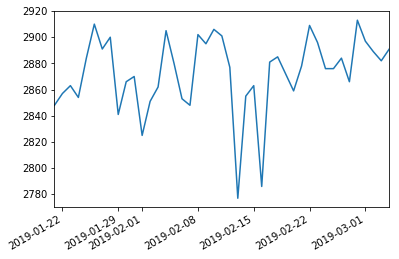

In [65]:
df['tweetDate_new'].value_counts().plot()

When we group tweets by day, we no longer see the Feb 26 spike, although a nearby date does have the greatest number of tweets. Still, it might be worth examining the late-hour tweets on Feb 26 that generated the spike when the time is included.

<h3>Notes and code for later use</h3>

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 21 columns):
authorFollower              123524 non-null int64
authorFriend                123524 non-null int64
authorLang                  123524 non-null object
authorLocation              85206 non-null object
authorPicture               123524 non-null object
authorScreen                123524 non-null object
authorScreen_original       9666 non-null object
tweetID                     123524 non-null object
tweetID_original            123524 non-null object
tweetMethod                 123524 non-null object
tweetText                   123524 non-null object
tweetTimeDate               123524 non-null object
tweetURL                    123524 non-null object
authorLang_new              123524 non-null object
authorLocation_new          85206 non-null category
authorPicture_new           123524 non-null object
tweetMethod_new             123524 non-null object
tweetTimeDate_new         

In [159]:
df2 = df

In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 21 columns):
authorFollower              123524 non-null int64
authorFriend                123524 non-null int64
authorLang                  123524 non-null object
authorLocation              85206 non-null object
authorPicture               123524 non-null object
authorScreen                123524 non-null object
authorScreen_original       9666 non-null object
tweetID                     123524 non-null object
tweetID_original            123524 non-null object
tweetMethod                 123524 non-null object
tweetText                   123524 non-null object
tweetTimeDate               123524 non-null object
tweetURL                    123524 non-null object
authorLang_new              123524 non-null object
authorLocation_new          85206 non-null category
authorPicture_new           123524 non-null object
tweetMethod_new             123524 non-null object
tweetTimeDate_new         

In [163]:
df2 = df2.drop(['authorLang','authorLocation', 'authorPicture', 'tweetID_original', 'tweetTimeDate', 'tweetURL', 'authorLocation_new', 'tweetMethod', 'tweetTimeDate_new'], axis=1)

In [164]:
df2 = df2.drop(['authorScreen_original'], axis=1)

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 11 columns):
authorFollower              123524 non-null int64
authorFriend                123524 non-null int64
authorScreen                123524 non-null object
tweetID                     123524 non-null object
tweetText                   123524 non-null object
authorLang_new              123524 non-null object
authorPicture_new           123524 non-null object
tweetMethod_new             123524 non-null object
authorLocation_SOCI620_1    85206 non-null object
tweetDate                   123524 non-null object
tweetDate_new               123524 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 10.4+ MB


In [166]:
df['tweetText'].str.contains(',').value_counts()

False    123524
Name: tweetText, dtype: int64

In [154]:
df['tweetText'] = df['tweetText'].replace(regex=r',', value='')

In [155]:
df['tweetText'][0:20]

0     RT @ezralevant: Abdul Habash a Syrian migrant to Canada made a terrifying bomb threat against Jason Kenney. He and his dad told our reporter it’s no big deal — in fact they’re mad the cops won’t give him his computer and phone back. #terrorists https://t.co/AujC0eU4Sk                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1     RT @1776Stonewall: https://t.co/CyucESMlFM  Texas health officials report that nearly 200 people contracted mumps 

In [167]:
df2.to_csv("../20190328_AM_Data.csv")

In [67]:
states = usRegions['State'].tolist()

In [68]:
stateCodes = usRegions['StateCode'].tolist()

In [69]:
regions = usRegions['Region'].tolist()

In [78]:
df['authorLocation'].str.contains('.*' + str(regions) + r'.*', regex=True).value_counts()

True     83549
False    1657 
Name: authorLocation, dtype: int64